# 전국 신규 민간아파트 분양가격 

전국 신규 민간아파트 분양가격 동향으로 2015년 10월부터 2018년 7월까지 데이터로 공공데이터포털을 통해 데이터를 가져왔다.
아파트 분양가에 대한 대한 분석보다 파이썬 데이터 분석 방법을 습득하는데에 있다.

In [0]:
# 시각화 도구로는 plotnine을 사용한다.
# 시각화 도구 설치하기
!pip install plotnine

In [0]:
!pip install missingno

In [0]:
import pandas as pd
import numpy as np
import re

In [0]:
# 한글 폰트 설치하기
%config InlineBackend.figure_format = 'retina'

!apt -qq -y install fonts-nanum > /dev/null
import matplotlib.font_manager as fm
fontpath = 'usr/share/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname = fontpath, size = 9)

from plotnine import *
import plotnine

In [0]:
# 기본 글꼴 변경
import matplotlib as mpl
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family = 'NanumBarunGothic')


In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
!pip show plotnine

Name: plotnine
Version: 0.5.1
Summary: A grammar of graphics for python
Home-page: https://github.com/has2k1/plotnine
Author: None
Author-email: None
License: GPL-2
Location: /usr/local/lib/python3.6/dist-packages
Requires: descartes, pandas, scipy, patsy, matplotlib, statsmodels, mizani, numpy
Required-by: 


In [0]:
# 현재 위치정보를 봅니다.
%pwd

'/content'

In [0]:
# data 폴더 아래에 apt_price 라는 폴더를 만들어 데이터를 모아둔다. 해당 데이터를 열어서 확인해본다.
# %ls data/apt_price
# colab에서는 파일을 업로드를 통해 할 수 있으므로 업로드시킨다.

In [0]:
pre_sale = pd.read_csv('apt_price_2018_06.csv', encoding = 'euc-kr')
pre_sale.shape

(2805, 5)

In [0]:
pre_sale.head()

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879


In [0]:
pre_sale.tail()

,지역명,규모구분,연도,월,분양가격(㎡)
2800,제주,전체,2018,6,3925
2801,제주,전용면적 60㎡이하,2018,6,5462
2802,제주,전용면적 60㎡초과 85㎡이하,2018,6,3639
2803,제주,전용면적 85㎡초과 102㎡이하,2018,6,NaN
2804,제주,전용면적 102㎡초과,2018,6,3029


In [0]:
# 분양가격이 숫자 타입이 아니다. 숫자 타입으로 변경해줘야 한다. 데이터 요약보기
pre_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2805 entries, 0 to 2804
Data columns (total 5 columns):
지역명        2805 non-null object
규모구분       2805 non-null object
연도         2805 non-null int64
월          2805 non-null int64
분양가격(㎡)    2674 non-null object
dtypes: int64(2), object(3)
memory usage: 109.6+ KB


In [0]:
pre_sale.dtypes

지역명        object
규모구분       object
연도          int64
월           int64
분양가격(㎡)    object
dtype: object

In [0]:
# 결측치가 얼마나 있는지 보기
pre_sale.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    131
dtype: int64

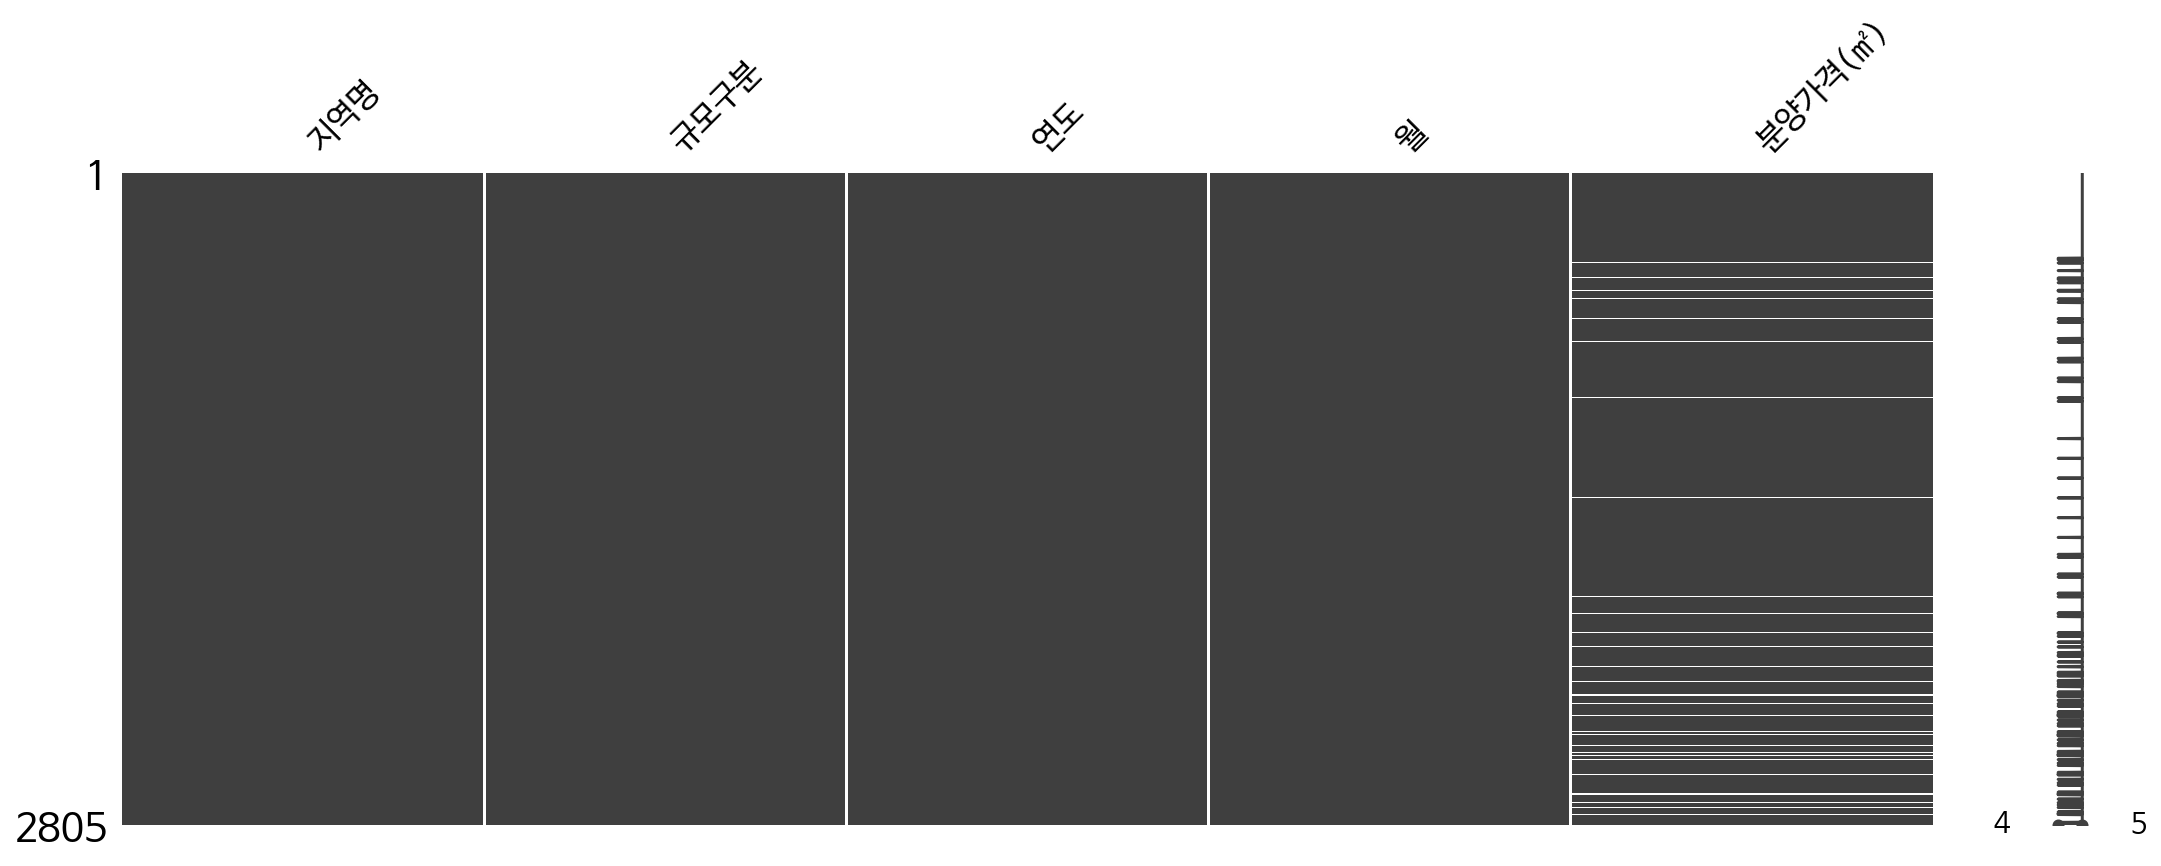

In [0]:
# 결측치 시각화하기
import missingno as msno
msno.matrix(pre_sale, figsize = (18, 6))

In [0]:
# 연도와 월은 카테고리 형태의 데이터이기 때문에 스트링 형태로 변경한다.
pre_sale['연도'] = pre_sale['연도'].astype(str)
pre_sale['월'] = pre_sale['연도'].astype(str)

In [0]:
pre_sale_price = pre_sale['분양가격(㎡)']

In [0]:
# 분양가격의 타입을 숫자로 변경해 줍니다.
pre_sale['분양가격'] = pd.to_numeric(pre_sale_price, errors = 'coerce')

# 평당 분양가격을 구해보자
pre_sale['평당분양가격'] = pre_sale['분양가격'] * 3.3

In [0]:
pre_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2805 entries, 0 to 2804
Data columns (total 7 columns):
지역명        2805 non-null object
규모구분       2805 non-null object
연도         2805 non-null object
월          2805 non-null object
분양가격(㎡)    2674 non-null object
분양가격       2582 non-null float64
평당분양가격     2582 non-null float64
dtypes: float64(2), object(5)
memory usage: 153.5+ KB


In [0]:
pre_sale.dtypes

지역명         object
규모구분        object
연도          object
월           object
분양가격(㎡)     object
분양가격       float64
평당분양가격     float64
dtype: object

In [0]:
# 분양가격에 결측기가 많다.
pre_sale.isnull().sum()


지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    131
분양가격       223
평당분양가격     223
dtype: int64

In [0]:
pre_sale.describe()

,분양가격,평당분양가격
count,2582.000000,2582.000000
mean,3056.522851,10086.525407
std,1110.111932,3663.369377
min,1868.000000,6164.400000
25%,2339.000000,7718.700000
50%,2738.500000,9037.050000
75%,3289.000000,10853.700000
max,8098.000000,26723.400000


In [0]:
# 오브젝트 타입을 요약하기
pre_sale.describe(include = [np.object])

,지역명,규모구분,연도,월,분양가격(㎡)
count,2805,2805,2805,2805,2674
unique,17,5,4,4,1278
top,충남,전용면적 85㎡초과 102㎡이하,2017,2017,2221
freq,165,561,1020,1020,17


In [0]:
# 2017년 데이터만 봅시다.
pre_sale_2017 = pre_sale.loc[pre_sale['연도'] == '2017']
pre_sale_2017.shape

(1020, 7)

In [0]:
# 도움말 볼 수 있음

pre_sale.describe?

In [0]:
# 같은 값을 갖고 있는 걸로 시도별로 동일하게 데이터가 들어 있는 것을 확인할 수 있다.
pre_sale['규모구분'].value_counts()

전용면적 85㎡초과 102㎡이하    561
전용면적 60㎡이하           561
전체                   561
전용면적 102㎡초과          561
전용면적 60㎡초과 85㎡이하     561
Name: 규모구분, dtype: int64

In [0]:
pre_sale['지역명'].value_counts()

충남    165
서울    165
대구    165
대전    165
전북    165
경남    165
세종    165
전남    165
경북    165
강원    165
제주    165
광주    165
울산    165
충북    165
경기    165
인천    165
부산    165
Name: 지역명, dtype: int64

In [0]:
# 전국 평균 분양가격 : groupby와 pivot_table 활용하기
# 분양가격만 봤을 때 2015년에서 2018년으로 갈수록 오른 것을 확인할 수 있다.

pd.options.display.float_format = '{:,.0f}'.format
pre_sale.groupby(pre_sale.연도).describe().T

연도             2015   2016   2017   2018
분양가격   count    243    984    899    456
       mean   2,789  2,934  3,140  3,299
       std      977  1,071  1,108  1,199
       min    1,868  1,900  1,976  2,076
       25%    2,225  2,282  2,365  2,470
       50%    2,516  2,672  2,849  2,912
       75%    3,026  3,148  3,456  3,647
       max    7,092  8,096  7,887  8,098
평당분양가격 count    243    984    899    456
       mean   9,203  9,683 10,360 10,888
       std    3,224  3,536  3,655  3,958
       min    6,164  6,270  6,521  6,851
       25%    7,342  7,531  7,804  8,153
       50%    8,303  8,818  9,402  9,611
       75%    9,984 10,390 11,405 12,036
       max   23,404 26,717 26,027 26,723

In [0]:
# 규모별 전국 평균 분양가격
# pre_sale.describe?를 통해 도움말 참고하기

In [0]:
pre_sale.pivot_table('평당분양가격', '규모구분', '연도')

연도,2015,2016,2017,2018
규모구분,,,,
전용면적 102㎡초과,"9,837","10,389","11,334","11,260"
전용면적 60㎡이하,"8,952","9,399","10,246","10,957"
전용면적 60㎡초과 85㎡이하,"8,892","9,296","9,825","10,438"
전용면적 85㎡초과 102㎡이하,"9,519","10,122","10,540","11,457"
전체,"8,893","9,293","9,901","10,560"


In [0]:
# 전국 분양가 변동금액 : 규모구분이 전체로 되어 있는 데이터만 가져온다.
region_year_all = pre_sale.loc[pre_sale['규모구분'] == '전체']
region_year = region_year_all.pivot_table('평당분양가격', '지역명', '연도').reset_index()
region_year

연도,지역명,2015,2016,2017,2018
0,강원,"7,160","7,011","7,127","7,643"
1,경기,"10,377","11,220","11,850","12,854"
2,경남,"7,586","7,848","8,120","8,894"
3,경북,"7,171","7,361","7,795","8,262"
4,광주,"8,052","8,899","9,464","9,630"
5,대구,"9,232","10,310","11,456","11,652"
6,대전,"8,098","8,502","9,045","9,589"
7,부산,"10,307","10,430","11,578","12,710"
8,서울,"19,725","20,663","21,376","22,299"
9,세종,"8,750","8,860","9,135","10,382"


In [0]:
region_year['변동액'] = (region_year['2018'] - region_year['2015']).astype(int)
max_delta_price = np.max(region_year['변동액'])*1000
min_delta_price = np.min(region_year['변동액'])*1000
mean_delta_price = np.mean(region_year['변동액'])*1000

print('2015년부터 2018년까지 분양가는 계속 상승, 상승액이 가장 큰 지역은 제주, 상승액은 평당 {:,.0f}원이다.'.format(max_delta_price))
print('상승액이 가장 작은 지역은 울산이며, 평당 {:,.0f}원이다.'.format(min_delta_price))
print('하지만 나중에 살펴보겠지만, 울산에는 결측치가 많다. 따라서 변동액이 가장 작다라고 판단하기 어렵다.')
print('전국 평균 변동액은 평당 {:,.0f}원이다.'.format(mean_delta_price))

region_year
      
# groupby를 사용하여 데이터를 요약하고 pivot_table을 사용하여 엑셀과 비슷하게 테이블을 그려보았음


2015년부터 2018년까지 분양가는 계속 상승, 상승액이 가장 큰 지역은 제주, 상승액은 평당 5,335,000원이다.
상승액이 가장 작은 지역은 울산이며, 평당 387,000원이다.
하지만 나중에 살펴보겠지만, 울산에는 결측치가 많다. 따라서 변동액이 가장 작다라고 판단하기 어렵다.
전국 평균 변동액은 평당 1,666,647원이다.


연도,지역명,2015,2016,2017,2018,변동액
0,강원,"7,160","7,011","7,127","7,643",482
1,경기,"10,377","11,220","11,850","12,854",2476
2,경남,"7,586","7,848","8,120","8,894",1308
3,경북,"7,171","7,361","7,795","8,262",1090
4,광주,"8,052","8,899","9,464","9,630",1577
5,대구,"9,232","10,310","11,456","11,652",2419
6,대전,"8,098","8,502","9,045","9,589",1490
7,부산,"10,307","10,430","11,578","12,710",2402
8,서울,"19,725","20,663","21,376","22,299",2574
9,세종,"8,750","8,860","9,135","10,382",1631


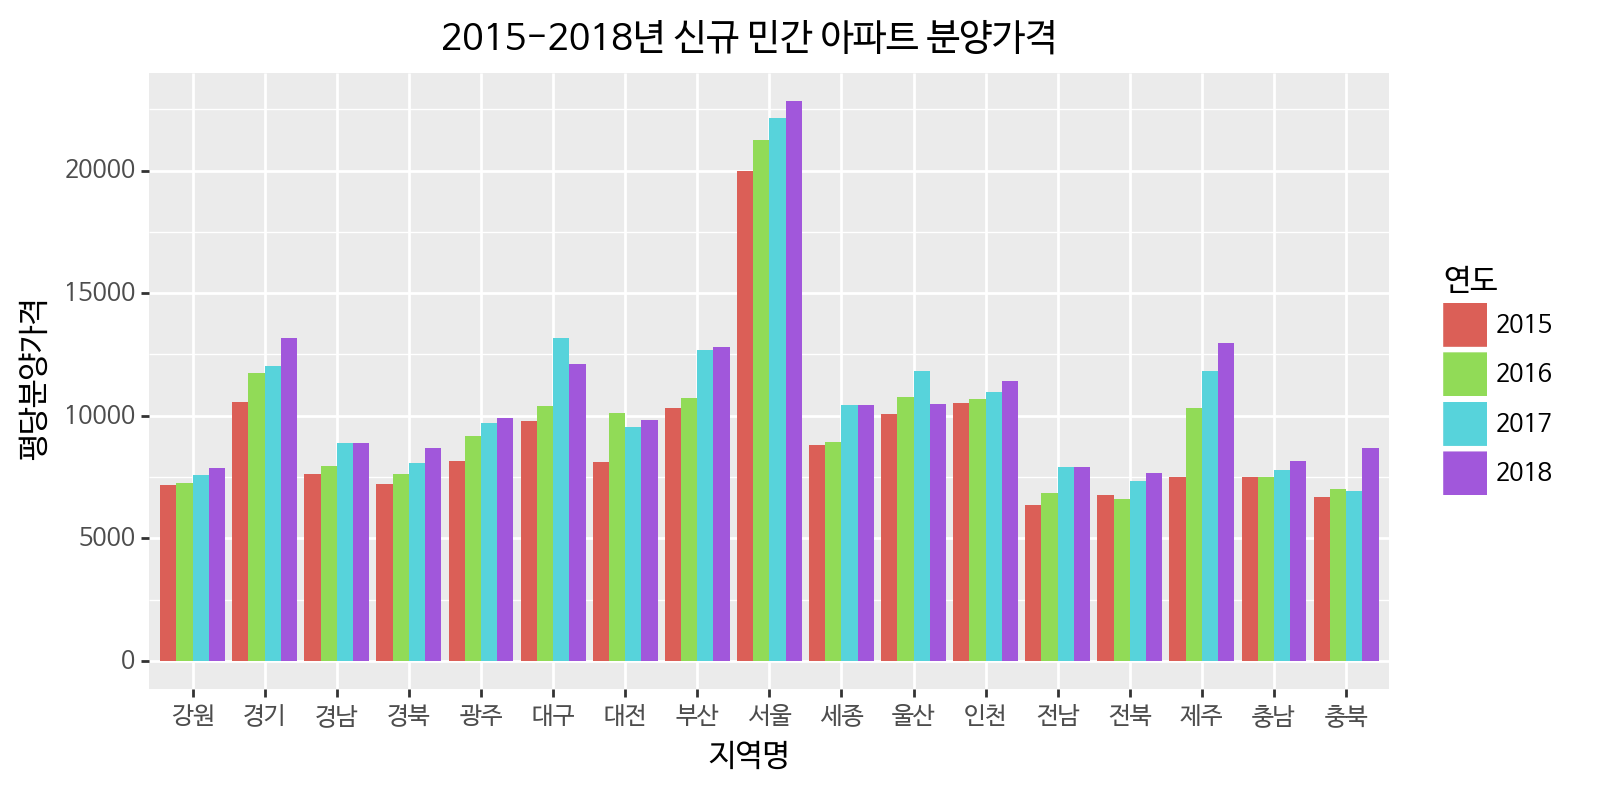

<ggplot: (-9223363307722888476)>

In [0]:
# 시각화하기 : Anscombe's quartet에 대해 살펴보면 요약된 데이터만으로 판단하기 어렵다는 것을 알 수 있음
# 연도별 변동 그래프 : 평균 분양 가격을 연도, 지역별로 그려보겠다, 먼저 한글 폰트를 지정해줘야 하는데, 지정하지 않으면 깨져보인다.

(ggplot(region_year_all, aes(x = '지역명', y = '평당분양가격', fill = '연도'))
 + geom_bar(stat = 'identity', position = 'dodge')
 + ggtitle('2015-2018년 신규 민간 아파트 분양가격')
 + theme(text = element_text(family = 'NanumBarunGothic'),
         figure_size = (8, 4))
)

In [0]:
# 지역별 평당 분양가격 합계 : 아래 데이터로 어느 정도 규모로 분양사업이 이루어졌는지 보자
# 전체 데이터로 봤을 때, 서울, 경기, 부산, 제주에 분양 사업이 다른 지역에 비해 규모가 큰 것으로 보여지지만 분양가격대비로 나눠볼 필요가 있다

pre_sale.pivot_table('평당분양가격', '규모구분', '지역명')

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
규모구분,,,,,,,,,,,,,,,,,
전용면적 102㎡초과,"7,871","13,601","9,222","8,586","10,381","12,303","14,282","12,584","22,035","9,259","9,974","13,836","7,550","7,793","10,435","8,477","7,900"
전용면적 60㎡이하,"7,185","12,300","8,320","7,646","8,494","11,254","8,816","10,656","21,976","9,071","8,965","10,853","6,980","7,184","14,700","7,772","6,951"
전용면적 60㎡초과 85㎡이하,"7,216","11,650","8,088","7,657","9,159","10,889","8,779","11,135","20,718","9,237","10,651","10,719","6,943","6,868","9,908","7,484","7,019"
전용면적 85㎡초과 102㎡이하,"7,612","12,029","9,834","8,776","9,296","9,497","9,037","10,971","23,714","9,210","8,861","11,286","7,858","7,739","10,744","9,102","8,145"
전체,"7,183","11,664","8,113","7,661","9,151","10,854","8,854","11,241","21,127","9,230","10,628","10,727","6,958","6,877","10,230","7,474","6,966"


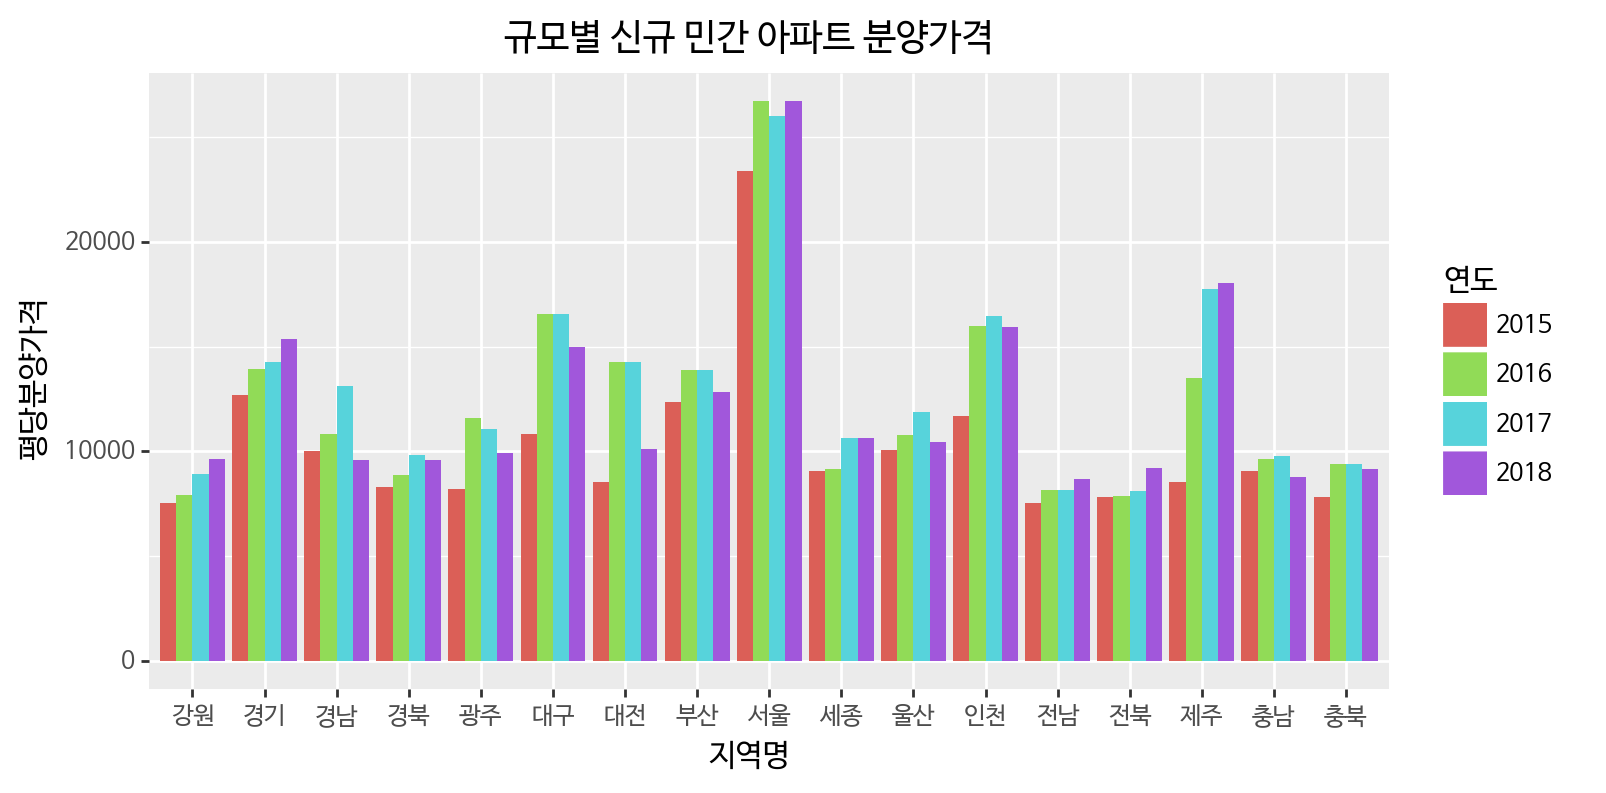

<ggplot: (-9223363307722936204)>

In [0]:
# 규모별
# 서울에 경우 전용면적 85초과 102이하가 분양가격이 가장 비싸게 나옵니다.
(ggplot(pre_sale, aes(x = '지역명', y = '평당분양가격', fill = '연도'))
 + geom_bar(stat = 'identity', position = 'dodge')
 + ggtitle('규모별 신규 민간 아파트 분양가격')
 + theme(text = element_text(family = 'NanumBarunGothic'),
         figure_size = (8, 4))
)


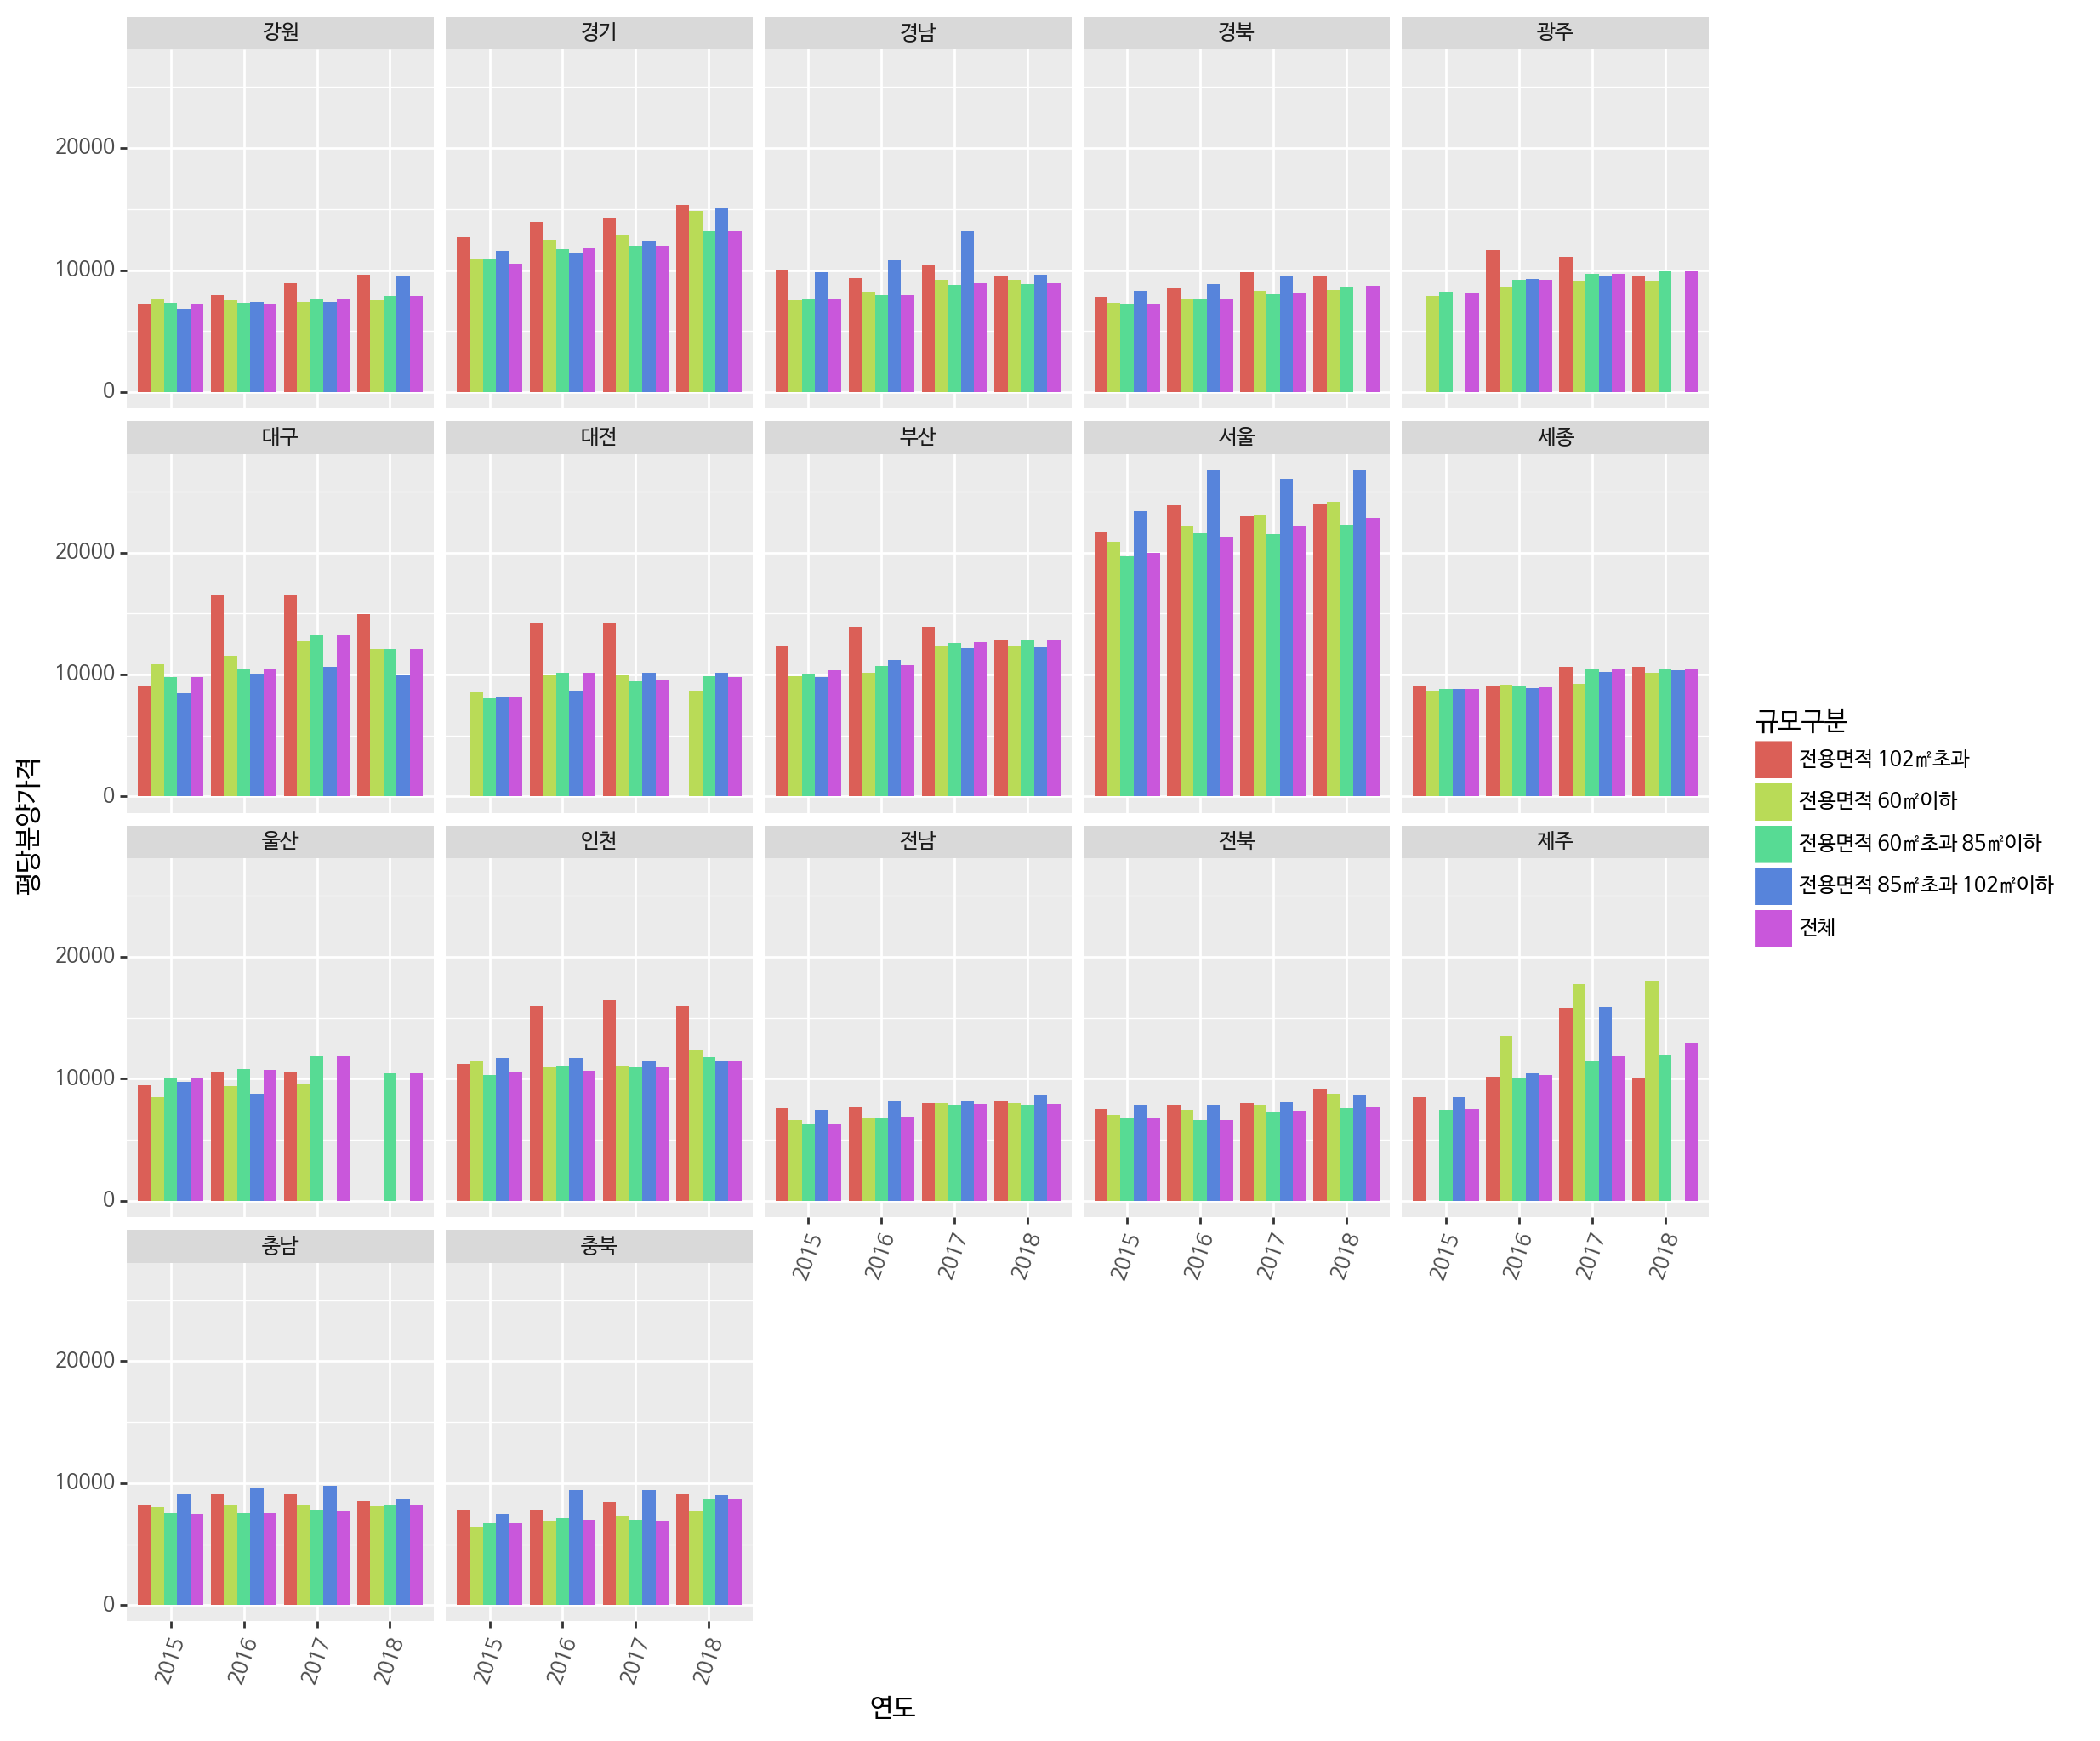

<ggplot: (8729135228038)>

In [0]:
# 위에 그린 그래프를 지역별로 나눠 보자
(ggplot(pre_sale)
 + aes(x = '연도', y = '평당분양가격', fill = '규모구분')
 + geom_bar(stat = 'identity', position = 'dodge')
 + facet_wrap('지역명')
 + theme(text = element_text(family = 'NanumBarunGothic'),
         axis_text_x = element_text(rotation = 70),
         figure_size = (12, 12))
)

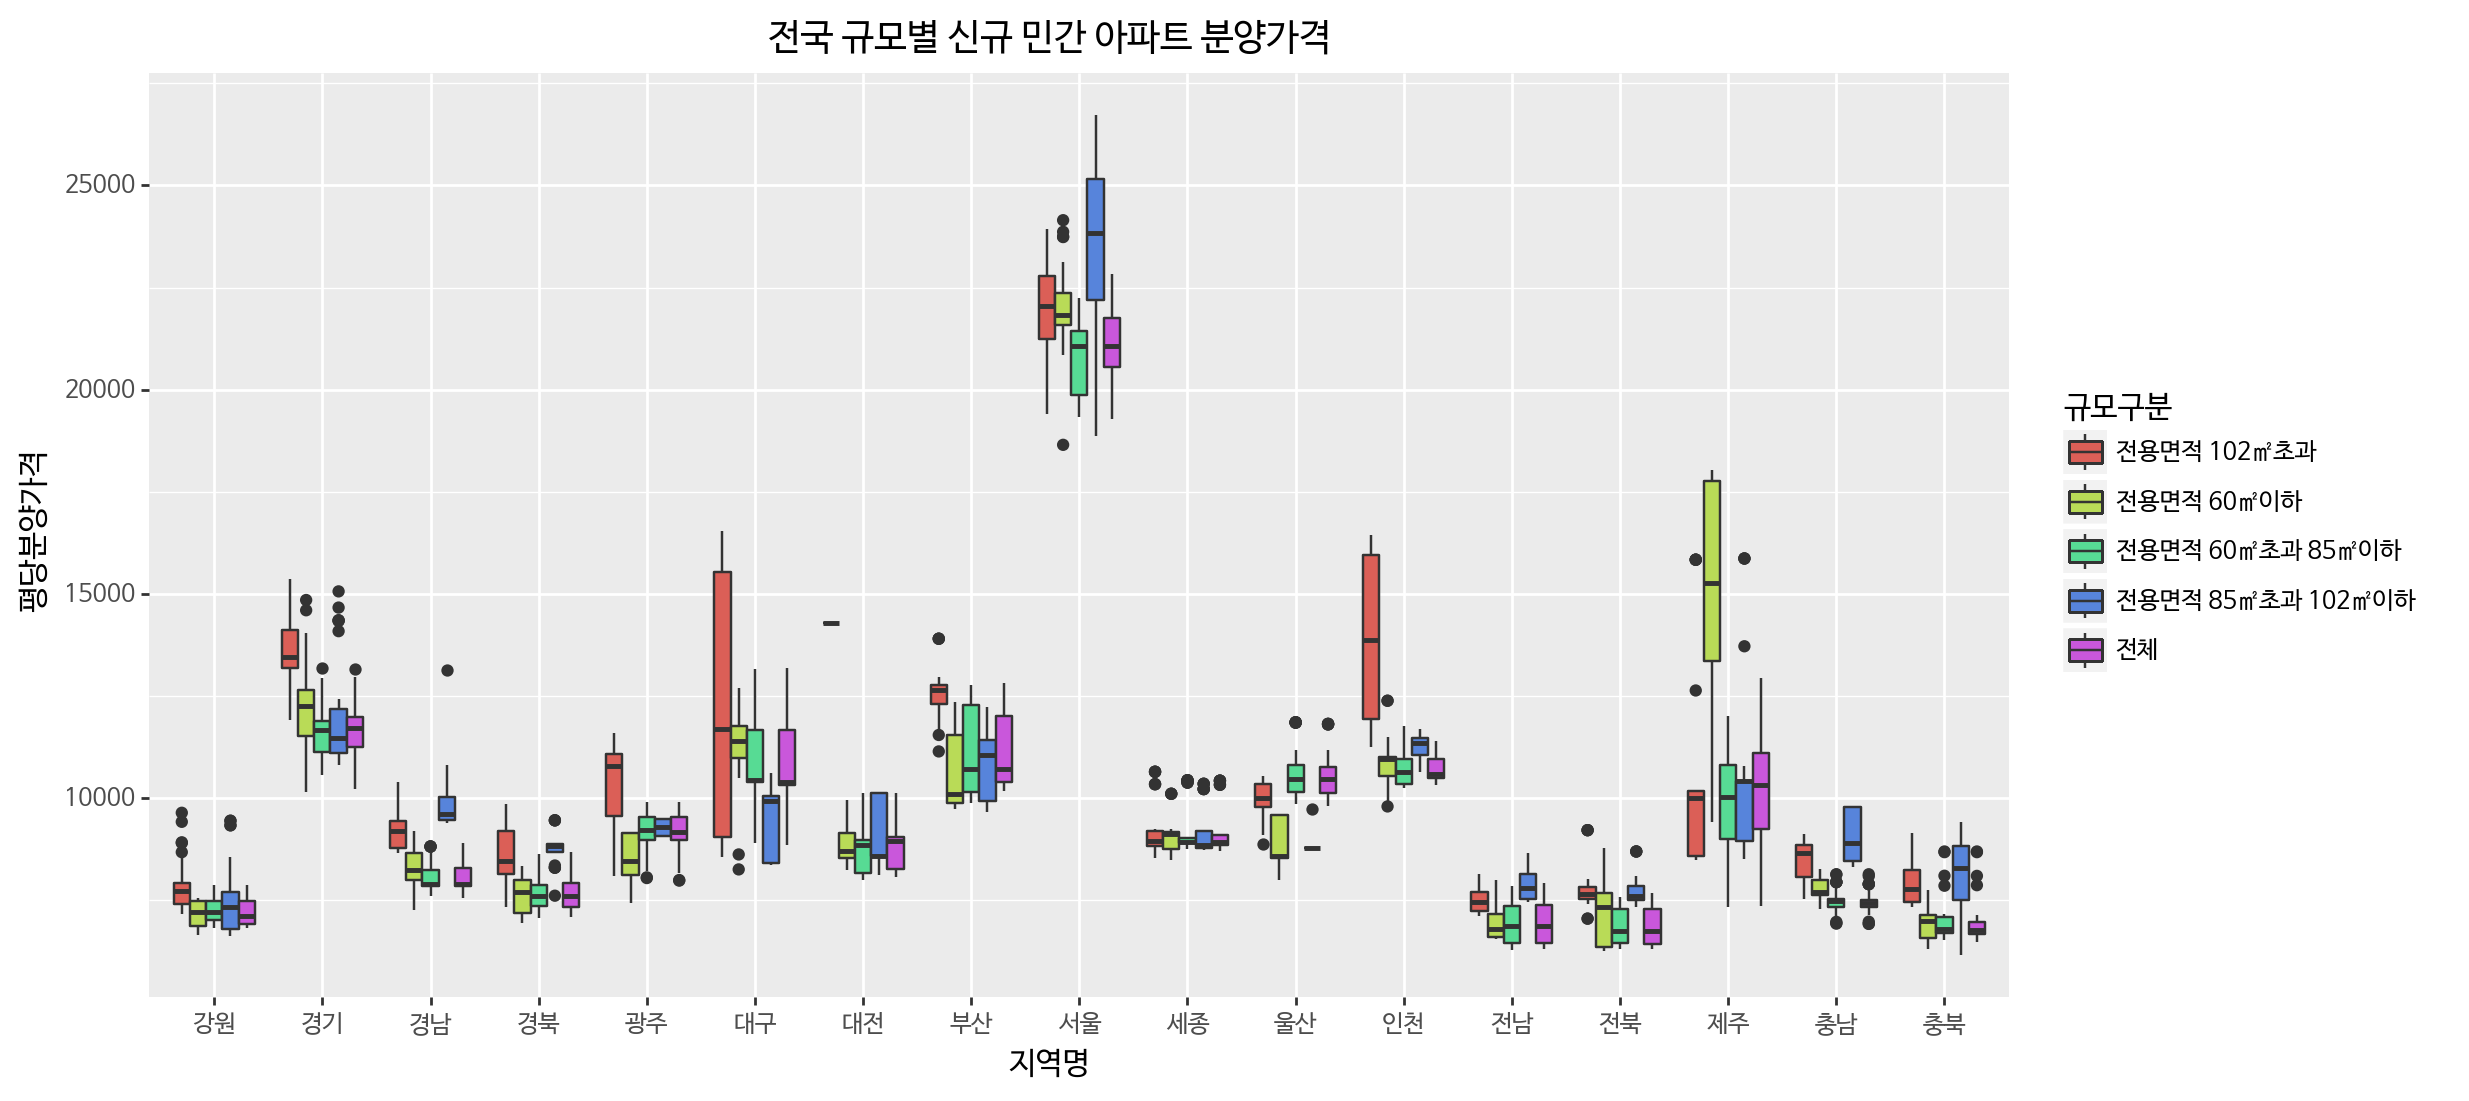

<ggplot: (8729130177046)>

In [0]:
# 박스플롯을 그려보자
(ggplot(pre_sale, aes(x = '지역명', y = '평당분양가격', fill = '규모구분'))
 + geom_boxplot()
 + ggtitle('전국 규모별 신규 민간 아파트 분양가격')
 + theme(text = element_text(family = 'NanumBarunGothic'),
         figure_size = (12, 6))
)

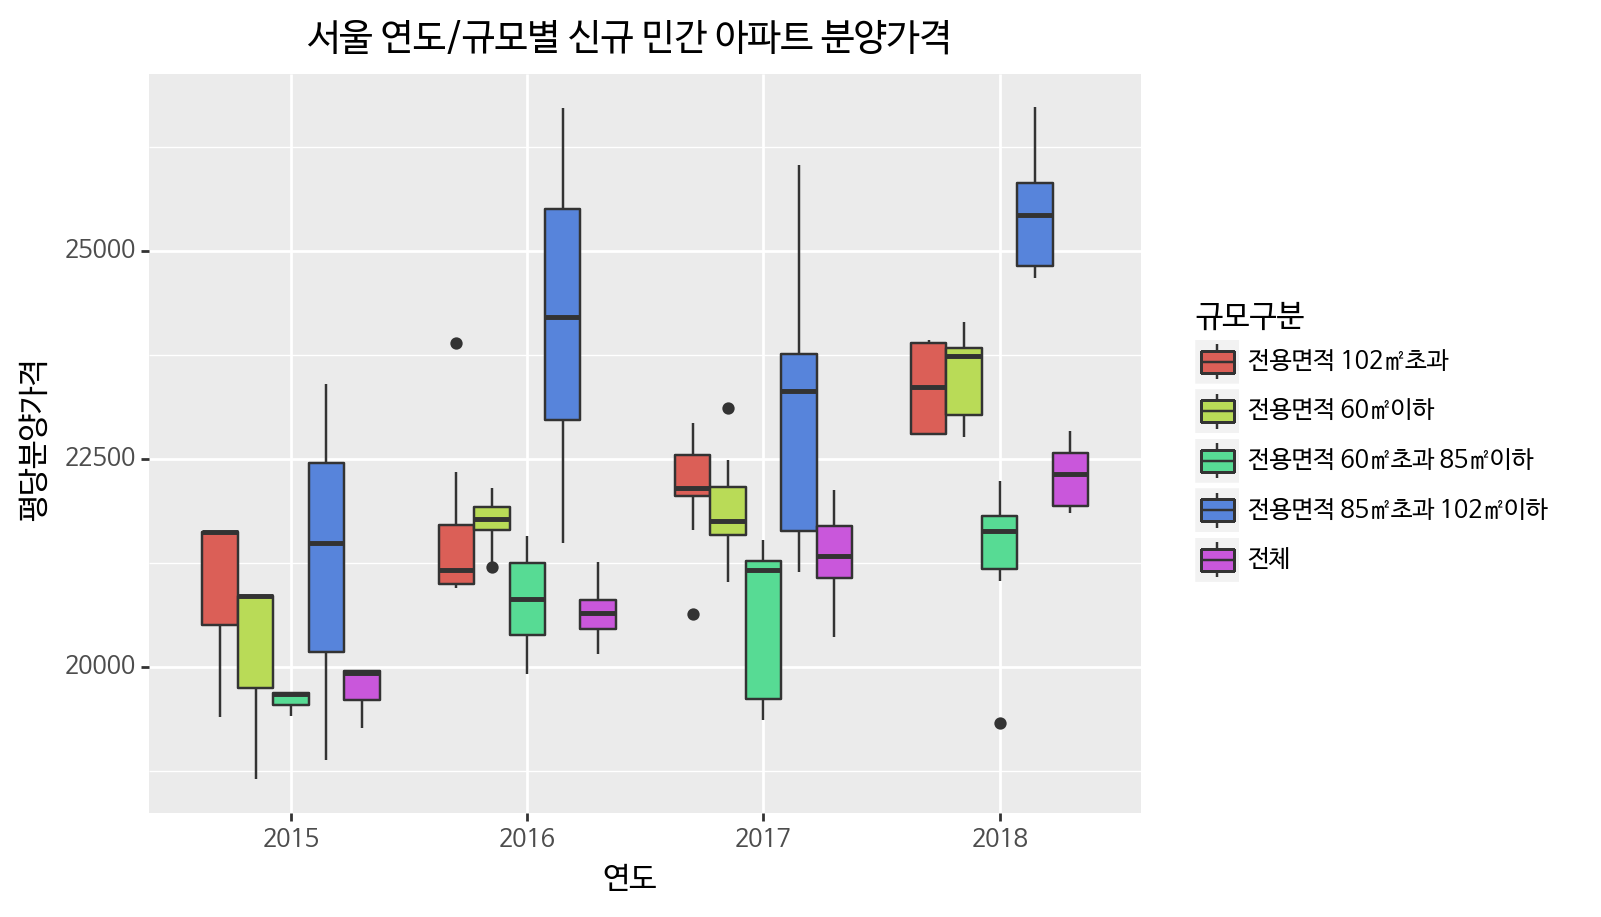

<ggplot: (8729129367581)>

In [0]:
pre_sale_seoul = pre_sale.loc[pre_sale['지역명'] == '서울']
(ggplot(pre_sale_seoul)
 + aes(x = '연도', y = '평당분양가격', fill = '규모구분')
 + ggtitle('서울 연도/규모별 신규 민간 아파트 분양가격')
 + geom_boxplot()
 + theme(text = element_text(family = 'NanumBarunGothic'))
)

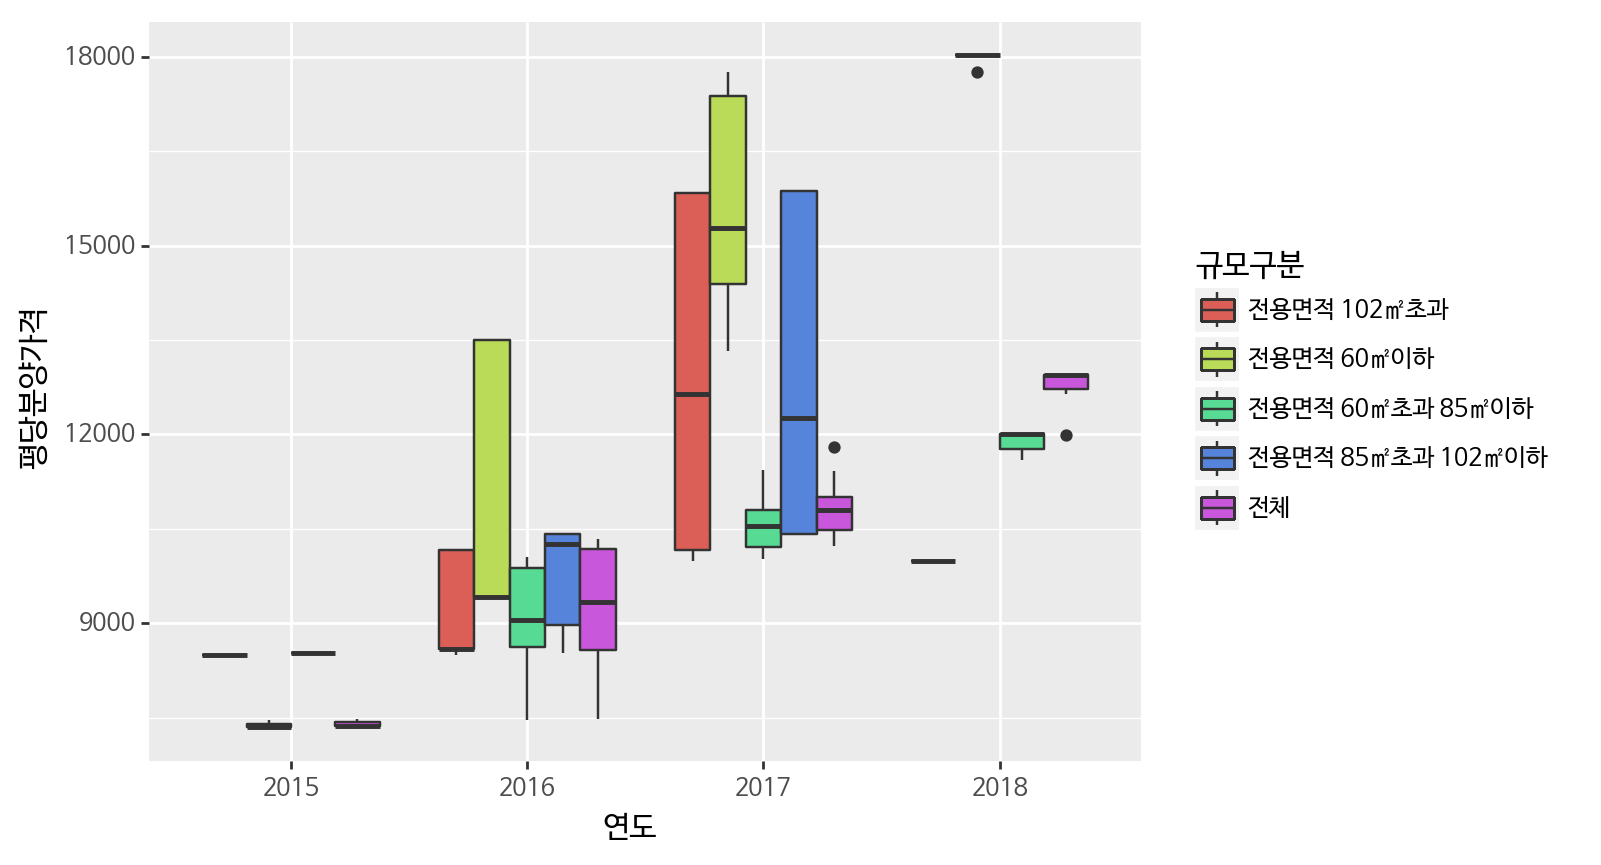

<ggplot: (-9223363307725476520)>

In [0]:
# 2015년에서 2018년까지 분양가 차이가 가장 컸던 제주도를 봅시다.
(ggplot(pre_sale.loc[pre_sale['지역명'] == '제주'])
 + aes(x = '연도', y = '평당분양가격', fill = '규모구분')
 + geom_boxplot()
 + theme(text = element_text(family = 'NanumBarunGothic'))
)

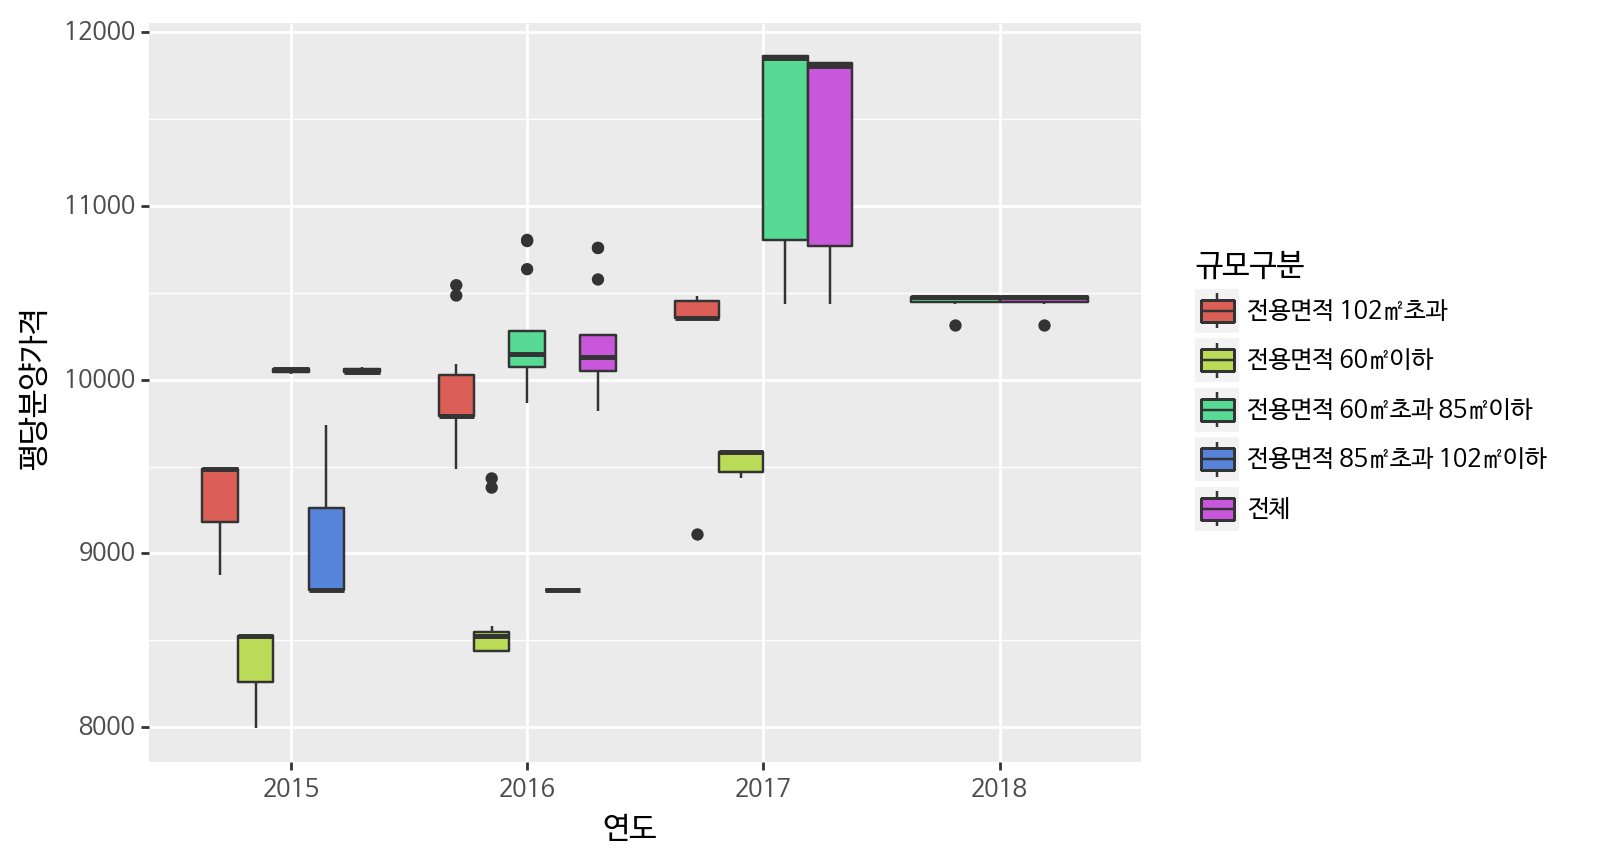

<ggplot: (-9223363307725477488)>

In [0]:
# 2015년에서 2018년까지 분양가 차이가 가장 작았던 울산을 봅니다.
# 실제로는 분양가 차이가 적은 것이 아니라 결측치로 인해 분양가 차이가 적게 보였다.
(ggplot(pre_sale.loc[pre_sale['지역명'] == '울산'])
 + aes(x = '연도', y = '평당분양가격', fill = '규모구분')
 + geom_boxplot()
 + theme(text = element_text(family = 'NanumBarunGothic'))
)

In [0]:
# Tidy Data 만들기 : 2013년 12월 ~ 2015년 9월 3.3당 분양가격, 2015년 10월부터 2018년 4월까지 데이터는 평당 분양가로 조정을 해주었었는데 데이터는 평당 분양가가 들어가 있다.
# 지역별 3.3당 평균 분양가격 천원 15.09월.csv 파일을 다운로드를 받습니다. 참고: https://www.data.go.kr/dataset/3035522/fileData.do
df = pd.read_csv('location_3.3_price_2015_09.csv', \
                encoding = 'euc-kr', skiprows = 1, header = 0)
df.shape

(23, 27)

In [0]:
# pandas에서 보기 쉽게 컬럼을 변경해 줄 필요가 있다.
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,구분,NaN,2013년,2014년,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015년,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(단위: 천원/3.3㎡)
1,시도,시군구,12월,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월,1월,2월,3월,4월,5월,6월,7월,8월,9월,전월비,전년말비,전년동월비
2,전국,NaN,"8,059","8,130","8,195","8,204","8,289","8,358","8,344","8,333","8,395","8,459","8,488","8,569","8,584","8,605","8,602","8,563","8,613","8,624","8,627","8,643","8,678","8,665",-13,82,207
3,서울,NaN,"18,189","17,925","17,925","18,016","18,098","19,446","18,867","18,742","19,274","19,404","19,759","20,242","20,269","20,670","20,670","19,415","18,842","18,367","18,374","18,152","18,443","17,969",-474,"-2,300","-1,434"
4,6대광역시,부산,"8,111","8,111","9,078","8,965","9,402","9,501","9,453","9,457","9,411","9,258","9,110","9,208","9,208","9,204","9,235","9,279","9,327","9,345","9,515","9,559","9,581","9,608",1,430,477
5,NaN,대구,"8,080","8,080","8,077","8,101","8,267","8,274","8,360","8,360","8,370","8,449","8,403","8,439","8,253","8,327","8,416","8,441","8,446","8,568","8,542","8,542","8,795","8,863",27,400,350
6,NaN,인천,"10,204","10,204","10,408","10,408","10,000","9,844","10,058","9,974","9,973","9,973","10,016","10,020","10,020","10,017","9,876","9,876","9,938","10,551","10,443","10,443","10,449","10,450",-162,-150,-131
7,NaN,광주,"6,098","7,326","7,611","7,346","7,346","7,523","7,659","7,612","7,622","7,802","7,707","7,752","7,748","7,752","7,756","7,861","7,914","7,877","7,881","8,089","8,231","8,083",-148,334,281
8,NaN,대전,"8,321","8,321","8,321","8,341","8,341","8,341","8,333","8,333","8,333","8,048","8,038","8,067","8,067","8,067","8,067","8,067","8,145","8,272","8,079","8,079","8,079","7,917",68,610,414
9,NaN,울산,"8,090","8,090","8,090","8,153","8,153","8,153","8,153","8,153","8,493","8,493","8,627","8,891","8,891","8,526","8,526","8,629","9,380","9,192","9,190","9,190","9,215","9,215",0,324,722


In [0]:
year = df.iloc[0]
month = df.iloc[1]

In [0]:
# 결측치를 채워준다.
year

Unnamed: 0                구분
Unnamed: 1               NaN
Unnamed: 2             2013년
Unnamed: 3             2014년
Unnamed: 4               NaN
Unnamed: 5               NaN
Unnamed: 6               NaN
Unnamed: 7               NaN
Unnamed: 8               NaN
Unnamed: 9               NaN
Unnamed: 10              NaN
Unnamed: 11              NaN
Unnamed: 12              NaN
Unnamed: 13              NaN
Unnamed: 14              NaN
Unnamed: 15            2015년
Unnamed: 16              NaN
Unnamed: 17              NaN
Unnamed: 18              NaN
Unnamed: 19              NaN
Unnamed: 20              NaN
Unnamed: 21              NaN
Unnamed: 22              NaN
Unnamed: 23              NaN
Unnamed: 24              NaN
Unnamed: 25              NaN
Unnamed: 26    (단위: 천원/3.3㎡)
Name: 0, dtype: object

In [0]:
# 컬럼을 새로 만들어 주기 위해 0번째와 1번째 행을 합쳐준다.
for i, y in enumerate(year):
  if i > 2 and i < 15:
      year[i] = ' '.join(['2014년', month[i]])
  elif i >= 15:
      year[i] = ' '.join(['2015년', month[i]])
  elif i == 2:
      year[i] = ' '.join([year[i], month[i]])
  elif i == 1:
      year[i] = '시군구'

print(year)

Unnamed: 0              구분
Unnamed: 1             시군구
Unnamed: 2       2013년 12월
Unnamed: 3        2014년 1월
Unnamed: 4        2014년 2월
Unnamed: 5        2014년 3월
Unnamed: 6        2014년 4월
Unnamed: 7        2014년 5월
Unnamed: 8        2014년 6월
Unnamed: 9        2014년 7월
Unnamed: 10       2014년 8월
Unnamed: 11       2014년 9월
Unnamed: 12      2014년 10월
Unnamed: 13      2014년 11월
Unnamed: 14      2014년 12월
Unnamed: 15       2015년 1월
Unnamed: 16       2015년 2월
Unnamed: 17       2015년 3월
Unnamed: 18       2015년 4월
Unnamed: 19       2015년 5월
Unnamed: 20       2015년 6월
Unnamed: 21       2015년 7월
Unnamed: 22       2015년 8월
Unnamed: 23       2015년 9월
Unnamed: 24      2015년 전월비
Unnamed: 25     2015년 전년말비
Unnamed: 26    2015년 전년동월비
Name: 0, dtype: object


In [0]:
df.columns = year

In [0]:
df = df.drop(df.index[[0, 1]])
df

,구분,시군구,2013년 12월,2014년 1월,2014년 2월,2014년 3월,2014년 4월,2014년 5월,2014년 6월,2014년 7월,2014년 8월,2014년 9월,2014년 10월,2014년 11월,2014년 12월,2015년 1월,2015년 2월,2015년 3월,2015년 4월,2015년 5월,2015년 6월,2015년 7월,2015년 8월,2015년 9월,2015년 전월비,2015년 전년말비,2015년 전년동월비
2,전국,NaN,"8,059","8,130","8,195","8,204","8,289","8,358","8,344","8,333","8,395","8,459","8,488","8,569","8,584","8,605","8,602","8,563","8,613","8,624","8,627","8,643","8,678","8,665",-13,82,207
3,서울,NaN,"18,189","17,925","17,925","18,016","18,098","19,446","18,867","18,742","19,274","19,404","19,759","20,242","20,269","20,670","20,670","19,415","18,842","18,367","18,374","18,152","18,443","17,969",-474,"-2,300","-1,434"
4,6대광역시,부산,"8,111","8,111","9,078","8,965","9,402","9,501","9,453","9,457","9,411","9,258","9,110","9,208","9,208","9,204","9,235","9,279","9,327","9,345","9,515","9,559","9,581","9,608",1,430,477
5,NaN,대구,"8,080","8,080","8,077","8,101","8,267","8,274","8,360","8,360","8,370","8,449","8,403","8,439","8,253","8,327","8,416","8,441","8,446","8,568","8,542","8,542","8,795","8,863",27,400,350
6,NaN,인천,"10,204","10,204","10,408","10,408","10,000","9,844","10,058","9,974","9,973","9,973","10,016","10,020","10,020","10,017","9,876","9,876","9,938","10,551","10,443","10,443","10,449","10,450",-162,-150,-131
7,NaN,광주,"6,098","7,326","7,611","7,346","7,346","7,523","7,659","7,612","7,622","7,802","7,707","7,752","7,748","7,752","7,756","7,861","7,914","7,877","7,881","8,089","8,231","8,083",-148,334,281
8,NaN,대전,"8,321","8,321","8,321","8,341","8,341","8,341","8,333","8,333","8,333","8,048","8,038","8,067","8,067","8,067","8,067","8,067","8,145","8,272","8,079","8,079","8,079","7,917",68,610,414
9,NaN,울산,"8,090","8,090","8,090","8,153","8,153","8,153","8,153","8,153","8,493","8,493","8,627","8,891","8,891","8,526","8,526","8,629","9,380","9,192","9,190","9,190","9,215","9,215",0,324,722
10,NaN,NaN,"8,151","8,355","8,597","8,552","8,585","8,606","8,669","8,648","8,700","8,671","8,650","8,730","8,698","8,649","8,646","8,692","8,858","8,967","8,942","8,984","9,058","9,023",-36,325,352
11,경기,NaN,"10,855","10,855","10,791","10,784","10,876","10,646","10,266","10,124","10,134","10,501","10,397","10,356","10,379","10,391","10,355","10,469","10,684","10,685","10,573","10,518","10,573","10,341",-232,-38,-160


In [0]:
# 지역 칼럼을 새로 만들어 시도와 시군구를 합쳐준다.
df['구분'] = df['구분'].fillna(' ')
df['시군구'] = df['시군구'].fillna(' ')

In [0]:
df['지역'] = df['구분'] + df['시군구']
df['지역']

2         전국 
3         서울 
4     6대광역시부산
5          대구
6          인천
7          광주
8          대전
9          울산
10           
11        경기 
12       수도권 
13        세종 
14       지방강원
15         충북
16         충남
17         전북
18         전남
19         경북
20         경남
21         제주
22           
Name: 지역, dtype: object

In [0]:
melt_columns = df.columns.copy()
melt_columns

Index(['구분', '시군구', '2013년 12월', '2014년 1월', '2014년 2월', '2014년 3월',
       '2014년 4월', '2014년 5월', '2014년 6월', '2014년 7월', '2014년 8월', '2014년 9월',
       '2014년 10월', '2014년 11월', '2014년 12월', '2015년 1월', '2015년 2월',
       '2015년 3월', '2015년 4월', '2015년 5월', '2015년 6월', '2015년 7월', '2015년 8월',
       '2015년 9월', '2015년 전월비', '2015년 전년말비', '2015년 전년동월비', '지역'],
      dtype='object', name=0)

In [0]:
df_2013_2015 = pd.melt(df, id_vars = ['지역'], value_vars = ['2013년 12월', '2014년 1월', '2014년 2월', '2014년 3월',
                                                          '2014년 4월', '2014년 5월', '2014년 6월', '2014년 7월', '2014년 8월',
                                                          '2014년 9월', '2014년 10월', '2014년 11월', '2014년 12월', '2015년 1월',
                                                          '2015년 2월', '2015년 3월','2015년 4월', '2015년 5월', '2015년 6월', 
                                                          '2015년 7월', '2015년 8월', '2015년 9월'])
df_2013_2015.head()

,지역,0,value
0,전국,2013년 12월,"8,059"
1,서울,2013년 12월,"18,189"
2,6대광역시부산,2013년 12월,"8,111"
3,대구,2013년 12월,"8,080"
4,인천,2013년 12월,"10,204"


In [0]:
df_2013_2015.columns = ['지역', '기간', '분양가']
df_2013_2015.head()

,지역,기간,분양가
0,전국,2013년 12월,"8,059"
1,서울,2013년 12월,"18,189"
2,6대광역시부산,2013년 12월,"8,111"
3,대구,2013년 12월,"8,080"
4,인천,2013년 12월,"10,204"


In [0]:
df_2013_2015['연도'] = df_2013_2015['기간'].apply(lambda year_month : year_month.split('년')[0])
df_2013_2015['월'] = df_2013_2015['기간'].apply(lambda year_month : re.sub('월', ' ', year_month.split('년')[1].strip()))
df_2013_2015.head()

,지역,기간,분양가,연도,월
0,전국,2013년 12월,"8,059",2013,12
1,서울,2013년 12월,"18,189",2013,12
2,6대광역시부산,2013년 12월,"8,111",2013,12
3,대구,2013년 12월,"8,080",2013,12
4,인천,2013년 12월,"10,204",2013,12


In [0]:
# 지역명 강원과 부산 정리하기
df_2013_2015['지역'].value_counts()

           44
세종         22
지방강원       22
 인천        22
 전남        22
 대전        22
 경북        22
 울산        22
 전북        22
 충남        22
 대구        22
수도권        22
전국         22
서울         22
경기         22
 광주        22
 경남        22
6대광역시부산    22
 제주        22
 충북        22
Name: 지역, dtype: int64

In [0]:
df_2013_2015['지역'] = df_2013_2015['지역'].apply(lambda x: re.sub('6대광역시부산', '부산', x))
df_2013_2015['지역'] = df_2013_2015['지역'].apply(lambda x: re.sub('지방강원', '강원', x))
df_2013_2015['지역'].value_counts()

        44
세종      22
 전북     22
 인천     22
 전남     22
 대전     22
부산      22
 경북     22
 울산     22
 충남     22
 대구     22
수도권     22
전국      22
서울      22
경기      22
 광주     22
 경남     22
 제주     22
강원      22
 충북     22
Name: 지역, dtype: int64

In [0]:
df_2013_2015.describe()

,지역,기간,분양가,연도,월
count,462,462,462,462,462
unique,20,22,371,3,12
top,,2015년 7월,"8,067",2014,8
freq,44,21,7,252,42


In [0]:
df_2013_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 5 columns):
지역     462 non-null object
기간     462 non-null object
분양가    462 non-null object
연도     462 non-null object
월      462 non-null object
dtypes: object(5)
memory usage: 18.1+ KB


In [0]:
df_2013_2015['분양가격'] = df_2013_2015['분양가'].str.replace(',', '').astype(int)

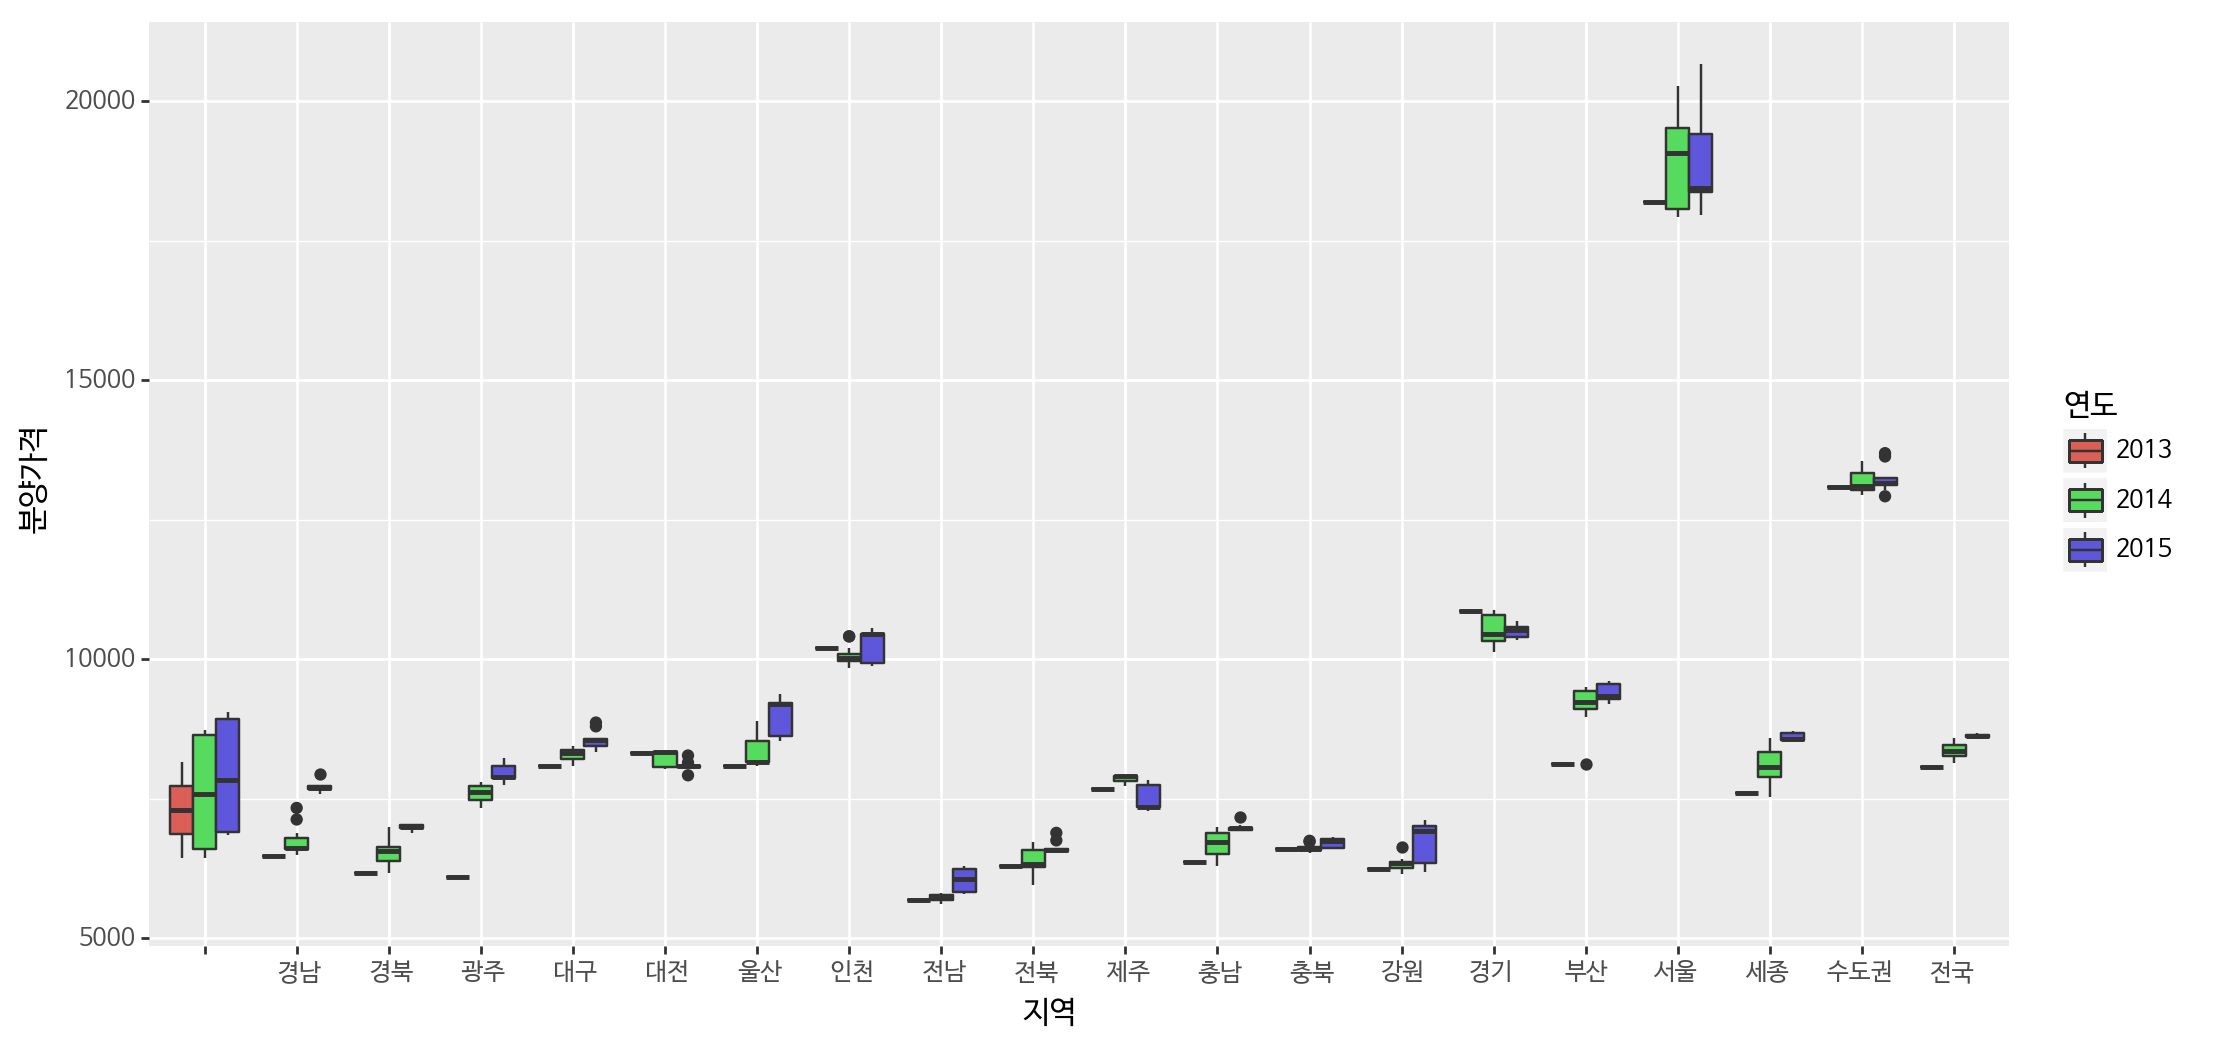

<ggplot: (-9223363307725752572)>

In [0]:
# 2013년 12월부터 2015년 9월까지의 데이터 시각화하기
(ggplot(df_2013_2015, aes(x = '지역', y = '분양가격', fill = '연도'))
 + geom_boxplot()
 + theme(text = element_text(family = 'NanumBarunGothic'),
        figure_size = (12, 6))
)

In [0]:
# 2013년부터 2018년 7월까지 데이터를 합칠 준비가 되었음
df_2015_2018 = pre_sale.loc[pre_sale['규모구분'] == '전체']
print(df_2015_2018.shape)
df_2015_2018.head()

(561, 7)


,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격
0,서울,전체,2015,2015,5841,"5,841","19,275"
5,인천,전체,2015,2015,3163,"3,163","10,438"
10,경기,전체,2015,2015,3138,"3,138","10,355"
15,부산,전체,2015,2015,3112,"3,112","10,270"
20,대구,전체,2015,2015,2682,"2,682","8,851"


In [0]:
df_2013_2015.columns

Index(['지역', '기간', '분양가', '연도', '월', '분양가격'], dtype='object')

In [0]:
df_2013_2015_prepare = df_2013_2015[['지역', '연도', '월', '분양가격']]
df_2013_2015_prepare.head()

,지역,연도,월,분양가격
0,전국,2013,12,8059
1,서울,2013,12,18189
2,부산,2013,12,8111
3,대구,2013,12,8080
4,인천,2013,12,10204


In [0]:
df_2013_2015_prepare.columns = ['지역명', '연도', '월', '평당분양가격']
df_2015_2018.columns

Index(['지역명', '규모구분', '연도', '월', '분양가격(㎡)', '분양가격', '평당분양가격'], dtype='object')

In [0]:
df_2015_2018_prepare = df_2015_2018[['지역명', '연도', '월', '평당분양가격']]
df_2015_2018_prepare.head()

,지역명,연도,월,평당분양가격
0,서울,2015,2015,"19,275"
5,인천,2015,2015,"10,438"
10,경기,2015,2015,"10,355"
15,부산,2015,2015,"10,270"
20,대구,2015,2015,"8,851"


In [0]:
df_2015_2018_prepare.describe()

,평당분양가격
count,544
mean,"9,702"
std,"3,361"
min,"6,300"
25%,"7,484"
50%,"8,928"
75%,"10,554"
max,"22,833"


In [0]:
df_2013_2018 = pd.concat([df_2013_2015_prepare, df_2015_2018_prepare])
df_2013_2018.shape

(1023, 4)

In [0]:
df_2013_2018.head()

,지역명,연도,월,평당분양가격
0,전국,2013,12,"8,059"
1,서울,2013,12,"18,189"
2,부산,2013,12,"8,111"
3,대구,2013,12,"8,080"
4,인천,2013,12,"10,204"


In [0]:
df_2013_2018.tail()

,지역명,연도,월,평당분양가격
2780,전북,2018,2018,"7,676"
2785,전남,2018,2018,"7,775"
2790,경북,2018,2018,"8,682"
2795,경남,2018,2018,"8,894"
2800,제주,2018,2018,"12,952"


In [0]:
df_2013_2015_region = df_2013_2015_prepare['지역명'].unique()
df_2013_2015_region

array(['전국 ', '서울 ', '부산', ' 대구', ' 인천', ' 광주', ' 대전', ' 울산', '  ', '경기 ',
       '수도권 ', '세종 ', '강원', ' 충북', ' 충남', ' 전북', ' 전남', ' 경북', ' 경남',
       ' 제주'], dtype=object)

In [0]:
df_2015_2018_region = df_2015_2018_prepare['지역명'].unique()
df_2015_2018_region

array(['서울', '인천', '경기', '부산', '대구', '광주', '대전', '울산', '세종', '강원', '충북',
       '충남', '전북', '전남', '경북', '경남', '제주'], dtype=object)

In [0]:
exclude_region = [region for region in df_2013_2015_region if not region in df_2015_2018_region]
exclude_region


['전국 ',
 '서울 ',
 ' 대구',
 ' 인천',
 ' 광주',
 ' 대전',
 ' 울산',
 '  ',
 '경기 ',
 '수도권 ',
 '세종 ',
 ' 충북',
 ' 충남',
 ' 전북',
 ' 전남',
 ' 경북',
 ' 경남',
 ' 제주']

In [0]:
df_2013_2018.shape

(1023, 4)

In [0]:
df_2013_2018.loc[df_2013_2018['지역명'].str.match('전국|수도권')].head()

,지역명,연도,월,평당분양가격
0,전국,2013,12,"8,059"
10,수도권,2013,12,"13,083"
21,전국,2014,1,"8,130"
31,수도권,2014,1,"12,995"
42,전국,2014,2,"8,195"


In [0]:
df_2013_2018.drop(df_2013_2018.loc[df_2013_2018['지역명'].str.match('전국|수도권')].index, axis = 0, inplace = True)
df_2013_2018.drop(df_2013_2018.loc[df_2013_2018['지역명'] == ''].index, axis = 0, inplace = True)

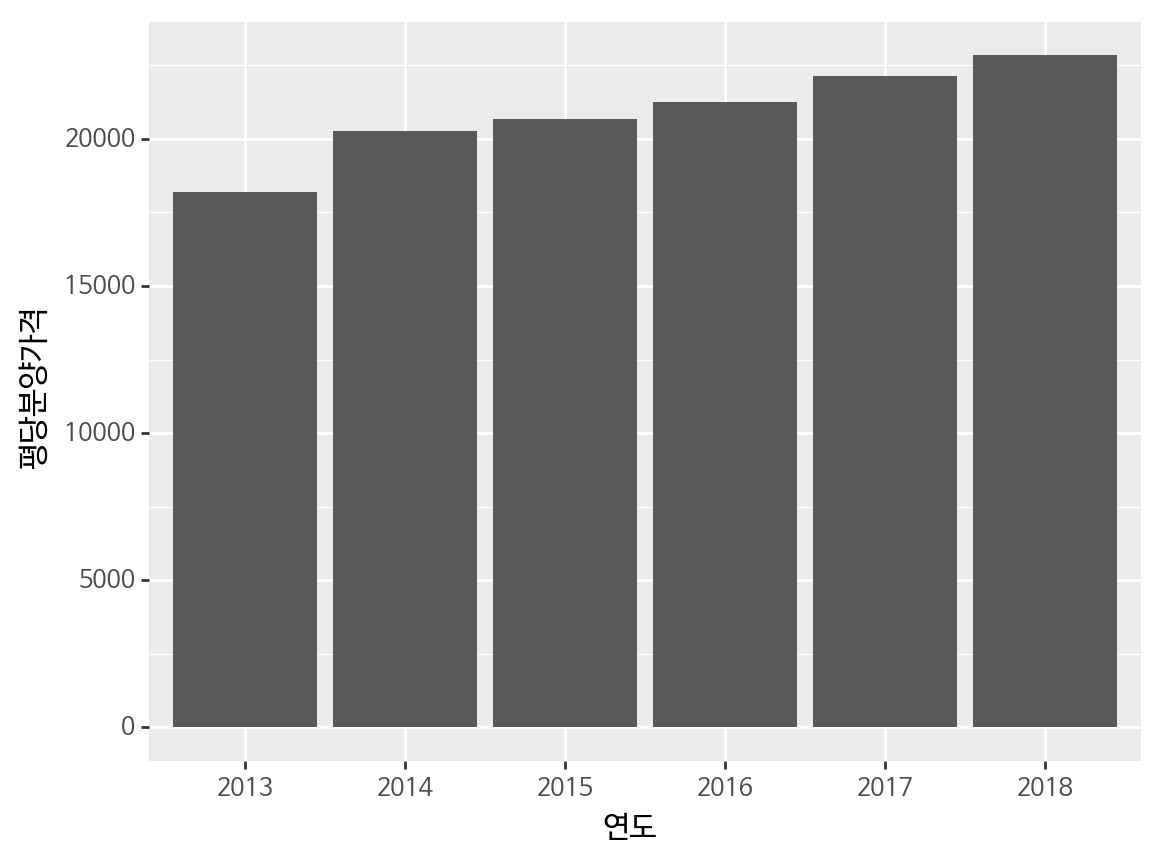

<ggplot: (8729128983167)>

In [0]:
# 2013년 12월부터 2018년 7월까지 전국 신규 민간 아파트 분양가격 동양 시각화하기, 연도별 막대그래프 
(ggplot(df_2013_2018, aes(x='연도', y='평당분양가격'))
 + geom_bar(stat='identity', position='dodge')
 + theme(text=element_text(family='NanumBarunGothic'))
)


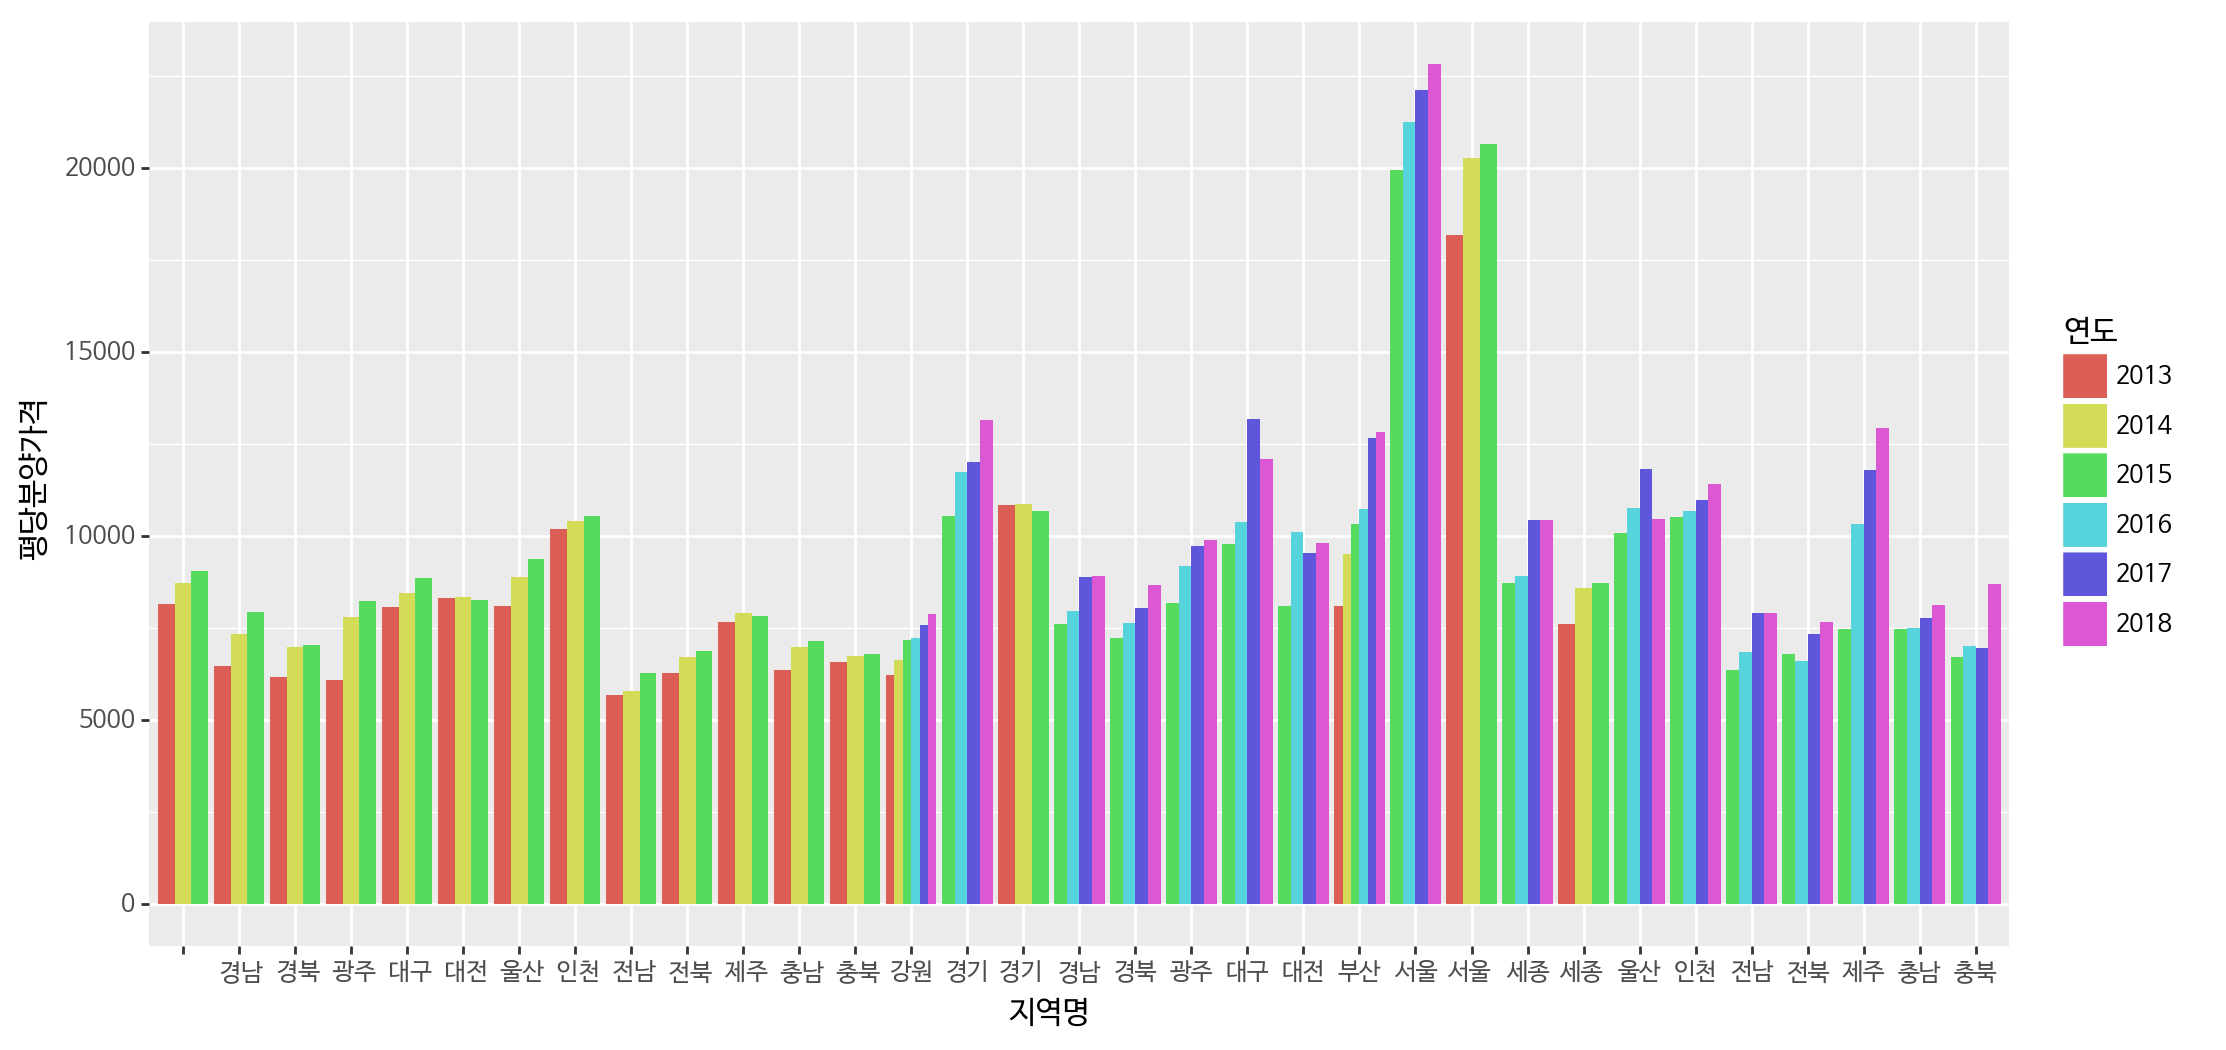

<ggplot: (-9223363307725259534)>

In [0]:
# 지역별 평당분양가격
(ggplot(df_2013_2018, aes(x='지역명', y='평당분양가격', fill='연도'))
 + geom_bar(stat='identity', position='dodge')
 + theme(text=element_text(family='NanumBarunGothic'),
         figure_size=(12, 6))
)

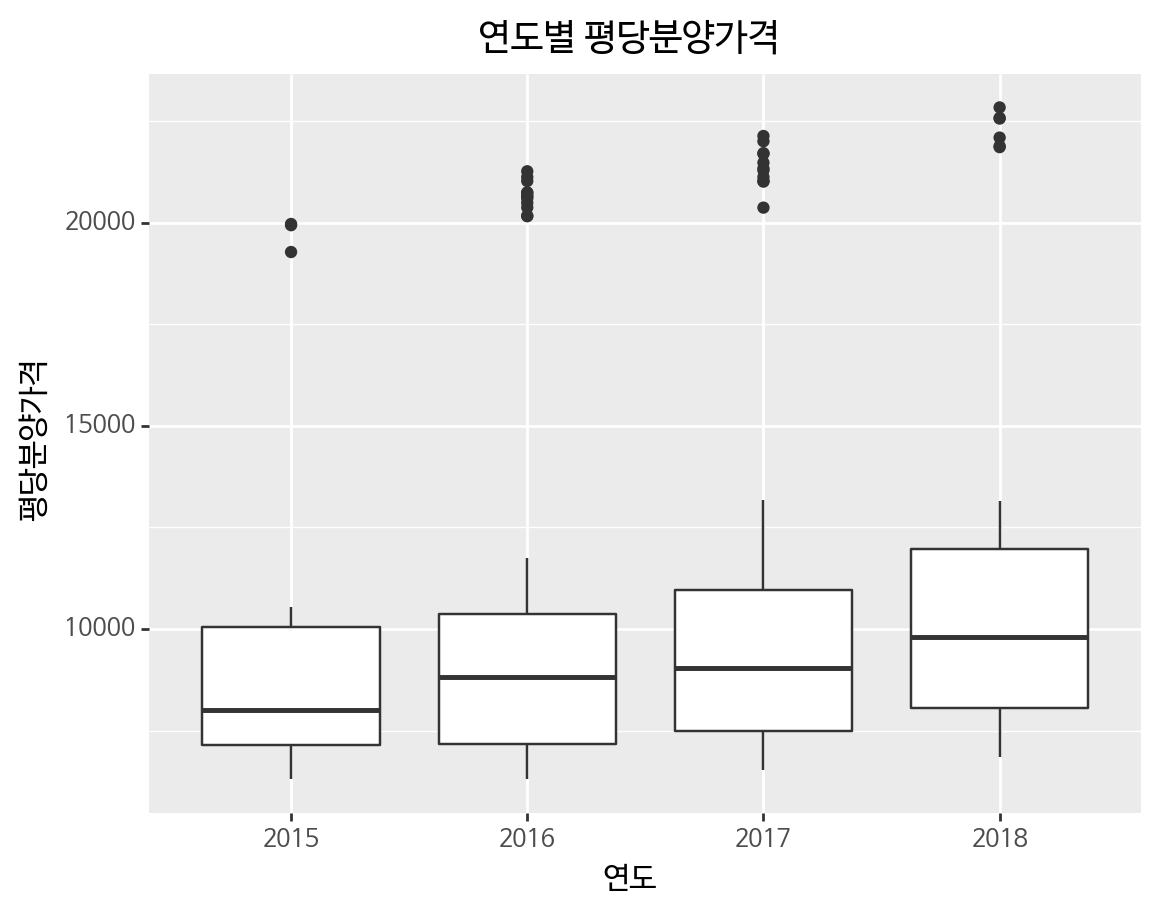

<ggplot: (8729129029640)>

In [0]:
# box그래프 연도별 평당분양가격
(ggplot(df_2015_2018_prepare)
 + aes(x='연도', y='평당분양가격')
 + ggtitle('연도별 평당분양가격')
 + geom_boxplot()
 + theme(text=element_text(family='NanumBarunGothic'))
)

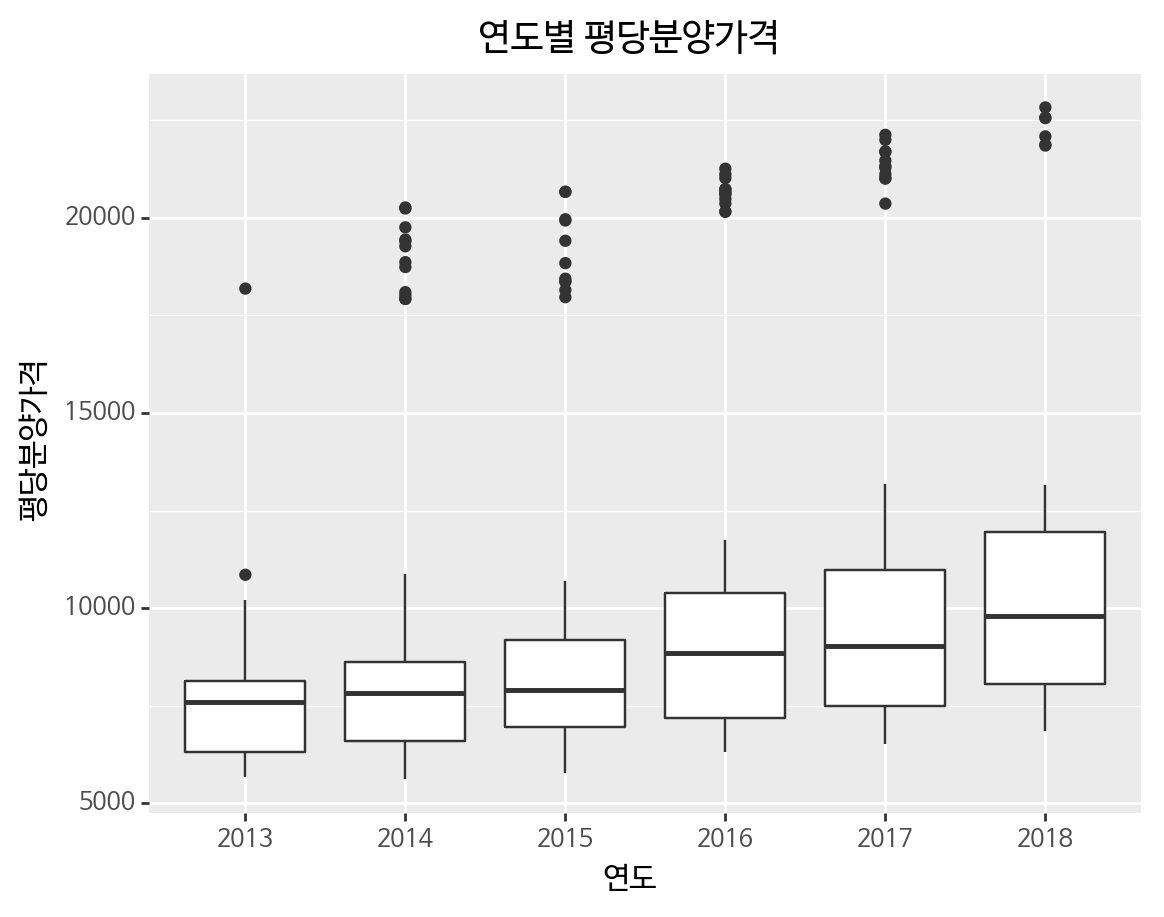

<ggplot: (8729129515577)>

In [0]:
# 연도별 평당분양가격 box그래프, 1년단위에 5000~ 20000까지
(ggplot(df_2013_2018)
 + aes(x='연도', y='평당분양가격')
 + ggtitle('연도별 평당분양가격')
 + geom_boxplot()
 + theme(text=element_text(family='NanumBarunGothic'))
)


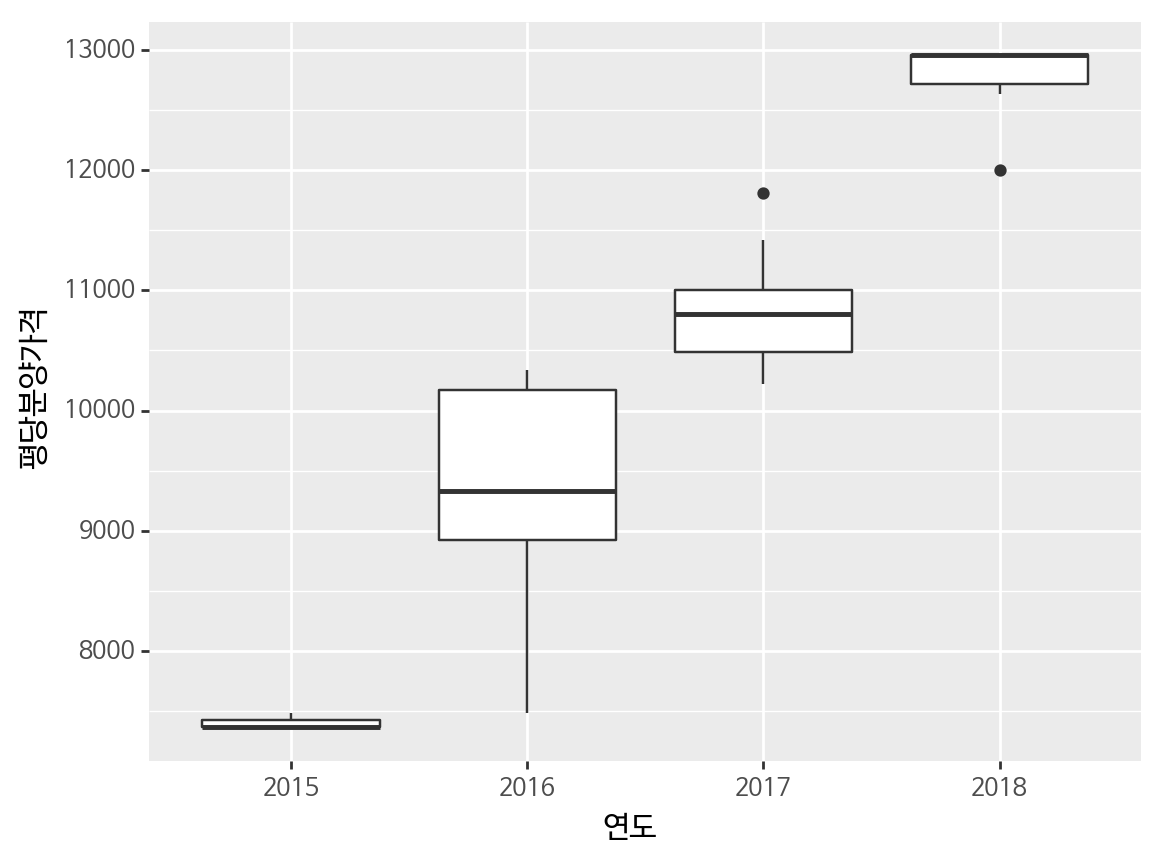

<ggplot: (8729129616697)>

In [0]:
# 제주도 연도별 평당분양가격
df_2013_2018_jeju = df_2013_2018.loc[df_2013_2018['지역명'] == '제주']
(ggplot(df_2013_2018_jeju)
 + aes(x='연도', y='평당분양가격')
 + geom_boxplot()
 + theme(text=element_text(family='NanumBarunGothic'))
)

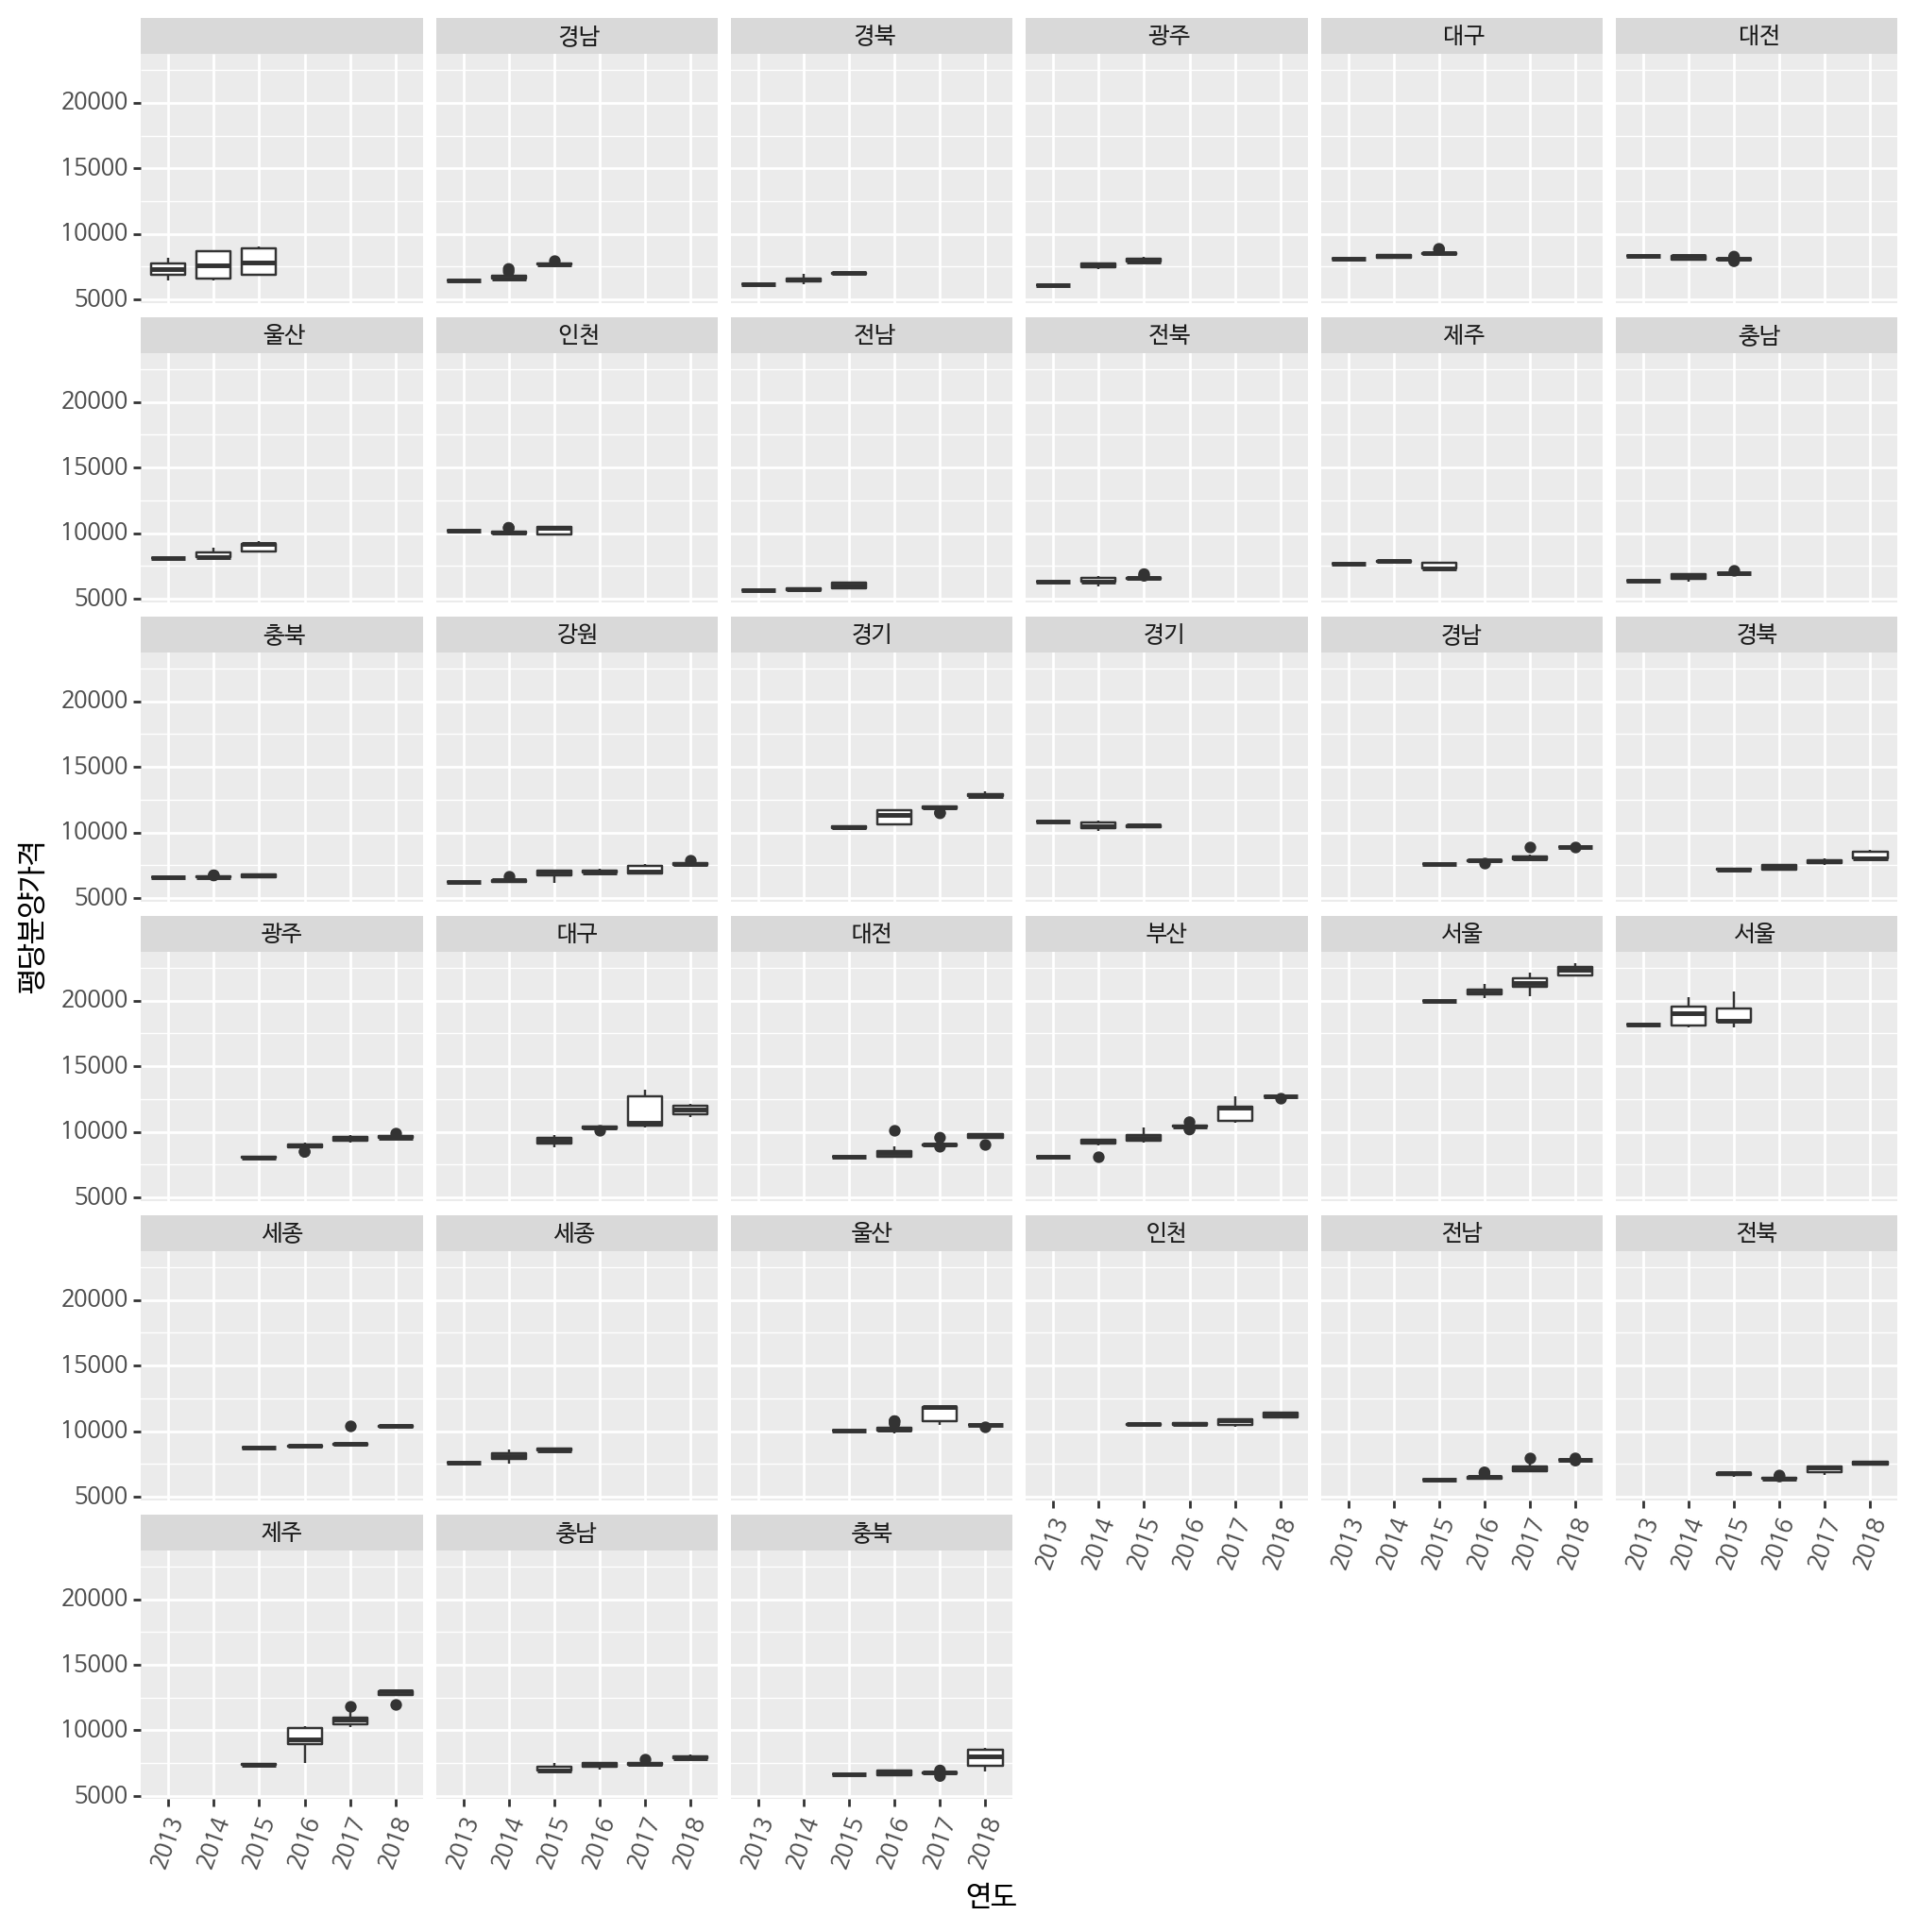

<ggplot: (-9223363307725041036)>

In [0]:
# 지역별로 연도별 평당분양가격 box그래프보기
(ggplot(df_2013_2018)
 + aes(x='연도', y='평당분양가격')
 + geom_boxplot()
 + facet_wrap('지역명')
 + theme(text=element_text(family='NanumBarunGothic'),
         axis_text_x=element_text(rotation=70),
         figure_size=(12, 12))
)